# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisempi työttömyysturvamalli.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


In [7]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=100_000 # size of the population to be simulated
size1=30_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_0 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_baseline'
perusresults='results/perus_results9'


# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [8]:
if False: # no baseline here
    cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
                  randomness=randomness,pinkslip=pinkslip,plotdebug=False)
    cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=False,predict=True,batch1=batch1,batch2=batch2,
                    save=perusmalli,plot=True,cont=True,start_from=perusmalli,results='results/perus_results9',
                    callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)
else:
    cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
                  randomness=randomness,pinkslip=pinkslip,plotdebug=False)
    cc1.load_sim(load=perusresults)
    #cc1.render()

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



# Verrokki

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625

training...








---------------------------------
| explained_variance | 0.999    |
| fps                | 1896     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0307  |
| total_timesteps    | 0        |
| value_loss         | 0.011    |
---------------------------------


---------------------------------
| explained_variance | 0.956    |
| fps                | 3288     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.247   |
| total_timesteps    | 21825    |
| value_los

---------------------------------
| explained_variance | 0.998    |
| fps                | 2663     |
| nupdates           | 190      |
| policy_entropy     | 0.989    |
| policy_loss        | -0.0181  |
| total_timesteps    | 458325   |
| value_loss         | 0.0222   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2663     |
| nupdates           | 200      |
| policy_entropy     | 0.961    |
| policy_loss        | -0.0123  |
| total_timesteps    | 482575   |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2664     |
| nupdates           | 210      |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0188  |
| total_timesteps    | 506825   |
| value_loss         | 0.00858  |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.991    |
| fps                | 2667     |
| nupdates           | 460      |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0262  |
| total_timesteps    | 1113075  |
| value_loss         | 0.103    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2667     |
| nupdates           | 470      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00287 |
| total_timesteps    | 1137325  |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2668     |
| nupdates           | 480      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.013   |
| total_timesteps    | 1161575  |
| value_loss         | 0.00848  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2675     |
| nupdates           | 730      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00254 |
| total_timesteps    | 1767825  |
| value_loss         | 0.0209   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2675     |
| nupdates           | 740      |
| policy_entropy     | 0.992    |
| policy_loss        | -0.00602 |
| total_timesteps    | 1792075  |
| value_loss         | 0.0156   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2676     |
| nupdates           | 750      |
| policy_entropy     | 1        |
| policy_loss        | -0.0222  |
| total_timesteps    | 1816325  |
| value_loss         | 0.0218   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2679     |
| nupdates           | 1000     |
| policy_entropy     | 1        |
| policy_loss        | -0.0195  |
| total_timesteps    | 2422575  |
| value_loss         | 0.0161   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2679     |
| nupdates           | 1010     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0251  |
| total_timesteps    | 2446825  |
| value_loss         | 0.0172   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2679     |
| nupdates           | 1020     |
| policy_entropy     | 0.986    |
| policy_loss        | -0.0121  |
| total_timesteps    | 2471075  |
| value_loss         | 0.00956  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2682     |
| nupdates           | 1270     |
| policy_entropy     | 0.987    |
| policy_loss        | -0.0224  |
| total_timesteps    | 3077325  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 2682     |
| nupdates           | 1280     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0441  |
| total_timesteps    | 3101575  |
| value_loss         | 0.0689   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2683     |
| nupdates           | 1290     |
| policy_entropy     | 0.981    |
| policy_loss        | 0.00157  |
| total_timesteps    | 3125825  |
| value_loss         | 0.0293   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2687     |
| nupdates           | 1540     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0191  |
| total_timesteps    | 3732075  |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2687     |
| nupdates           | 1550     |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0253  |
| total_timesteps    | 3756325  |
| value_loss         | 0.0149   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2687     |
| nupdates           | 1560     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0179  |
| total_timesteps    | 3780575  |
| value_loss         | 0.0127   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2691     |
| nupdates           | 1810     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0102  |
| total_timesteps    | 4386825  |
| value_loss         | 0.0165   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2691     |
| nupdates           | 1820     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0194  |
| total_timesteps    | 4411075  |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2691     |
| nupdates           | 1830     |
| policy_entropy     | 0.958    |
| policy_loss        | -0.00327 |
| total_timesteps    | 4435325  |
| value_loss         | 0.0213   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2694     |
| nupdates           | 2080     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0144  |
| total_timesteps    | 5041575  |
| value_loss         | 0.00728  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2694     |
| nupdates           | 2090     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.015   |
| total_timesteps    | 5065825  |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2695     |
| nupdates           | 2100     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0166  |
| total_timesteps    | 5090075  |
| value_loss         | 0.00958  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2697     |
| nupdates           | 2350     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0146  |
| total_timesteps    | 5696325  |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2697     |
| nupdates           | 2360     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.01    |
| total_timesteps    | 5720575  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2697     |
| nupdates           | 2370     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0275  |
| total_timesteps    | 5744825  |
| value_loss         | 0.0146   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2699     |
| nupdates           | 2620     |
| policy_entropy     | 1        |
| policy_loss        | -0.0209  |
| total_timesteps    | 6351075  |
| value_loss         | 0.0174   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2699     |
| nupdates           | 2630     |
| policy_entropy     | 0.924    |
| policy_loss        | 0.0253   |
| total_timesteps    | 6375325  |
| value_loss         | 0.0385   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2699     |
| nupdates           | 2640     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0274  |
| total_timesteps    | 6399575  |
| value_loss         | 0.0287   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2701     |
| nupdates           | 2890     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00709 |
| total_timesteps    | 7005825  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2701     |
| nupdates           | 2900     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0112  |
| total_timesteps    | 7030075  |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2701     |
| nupdates           | 2910     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0059  |
| total_timesteps    | 7054325  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2700     |
| nupdates           | 3160     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0135  |
| total_timesteps    | 7660575  |
| value_loss         | 0.00894  |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2700     |
| nupdates           | 3170     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0398  |
| total_timesteps    | 7684825  |
| value_loss         | 0.0411   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2700      |
| nupdates           | 3180      |
| policy_entropy     | 0.998     |
| policy_loss        | -0.000422 |
| total_timesteps    | 7709075   |
| value_loss         | 0.0152    |
----------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2698     |
| nupdates           | 3430     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0302  |
| total_timesteps    | 8315325  |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2698     |
| nupdates           | 3440     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00531  |
| total_timesteps    | 8339575  |
| value_loss         | 0.00554  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2698     |
| nupdates           | 3450     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00681 |
| total_timesteps    | 8363825  |
| value_loss         | 0.0168   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2693     |
| nupdates           | 3700     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0116  |
| total_timesteps    | 8970075  |
| value_loss         | 0.00715  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2693     |
| nupdates           | 3710     |
| policy_entropy     | 1        |
| policy_loss        | -0.017   |
| total_timesteps    | 8994325  |
| value_loss         | 0.0132   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2693     |
| nupdates           | 3720     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0129  |
| total_timesteps    | 9018575  |
| value_loss         | 0.00985  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2685     |
| nupdates           | 3970     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.035   |
| total_timesteps    | 9624825  |
| value_loss         | 0.0147   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2685     |
| nupdates           | 3980     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.037   |
| total_timesteps    | 9649075  |
| value_loss         | 0.0263   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2684     |
| nupdates           | 3990     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00303 |
| total_timesteps    | 9673325  |
| value_loss         | 0.00935  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2672     |
| nupdates           | 4240     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0151  |
| total_timesteps    | 10279575 |
| value_loss         | 0.00986  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2672     |
| nupdates           | 4250     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00439 |
| total_timesteps    | 10303825 |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2671     |
| nupdates           | 4260     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00272 |
| total_timesteps    | 10328075 |
| value_loss         | 0.0325   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2655     |
| nupdates           | 4510     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0118  |
| total_timesteps    | 10934325 |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2655     |
| nupdates           | 4520     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00375 |
| total_timesteps    | 10958575 |
| value_loss         | 0.00887  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2654     |
| nupdates           | 4530     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0219  |
| total_timesteps    | 10982825 |
| value_loss         | 0.0154   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2635     |
| nupdates           | 4780     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0197  |
| total_timesteps    | 11589075 |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2634     |
| nupdates           | 4790     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0133  |
| total_timesteps    | 11613325 |
| value_loss         | 0.00945  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2634     |
| nupdates           | 4800     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0061  |
| total_timesteps    | 11637575 |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.989    |
| fps                | 2614     |
| nupdates           | 5050     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0417  |
| total_timesteps    | 12243825 |
| value_loss         | 0.14     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2613     |
| nupdates           | 5060     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00869 |
| total_timesteps    | 12268075 |
| value_loss         | 0.00691  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2612     |
| nupdates           | 5070     |
| policy_entropy     | 0.951    |
| policy_loss        | -0.00143 |
| total_timesteps    | 12292325 |
| value_loss         | 0.00767  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2592     |
| nupdates           | 5320     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00232 |
| total_timesteps    | 12898575 |
| value_loss         | 0.00404  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2591     |
| nupdates           | 5330     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00829 |
| total_timesteps    | 12922825 |
| value_loss         | 0.00691  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2590     |
| nupdates           | 5340     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0322  |
| total_timesteps    | 12947075 |
| value_loss         | 0.00701  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2573     |
| nupdates           | 5590     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00706 |
| total_timesteps    | 13553325 |
| value_loss         | 0.00944  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2572     |
| nupdates           | 5600     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0144  |
| total_timesteps    | 13577575 |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2571     |
| nupdates           | 5610     |
| policy_entropy     | 0.979    |
| policy_loss        | -0.0101  |
| total_timesteps    | 13601825 |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2554     |
| nupdates           | 5860     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00102 |
| total_timesteps    | 14208075 |
| value_loss         | 0.00751  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2553     |
| nupdates           | 5870     |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0111  |
| total_timesteps    | 14232325 |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2553     |
| nupdates           | 5880     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.00385 |
| total_timesteps    | 14256575 |
| value_loss         | 0.00626  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2534     |
| nupdates           | 6130     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00991 |
| total_timesteps    | 14862825 |
| value_loss         | 0.00929  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2533     |
| nupdates           | 6140     |
| policy_entropy     | 1        |
| policy_loss        | -0.00536 |
| total_timesteps    | 14887075 |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2532     |
| nupdates           | 6150     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00979 |
| total_timesteps    | 14911325 |
| value_loss         | 0.00665  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2520     |
| nupdates           | 6400     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0122  |
| total_timesteps    | 15517575 |
| value_loss         | 0.00431  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2519     |
| nupdates           | 6410     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.00226  |
| total_timesteps    | 15541825 |
| value_loss         | 0.00514  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2519     |
| nupdates           | 6420     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0325  |
| total_timesteps    | 15566075 |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2510     |
| nupdates           | 6670     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0107  |
| total_timesteps    | 16172325 |
| value_loss         | 0.00842  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2510     |
| nupdates           | 6680     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.00299  |
| total_timesteps    | 16196575 |
| value_loss         | 0.0063   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2509     |
| nupdates           | 6690     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0137  |
| total_timesteps    | 16220825 |
| value_loss         | 0.00828  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2503     |
| nupdates           | 6940     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0151  |
| total_timesteps    | 16827075 |
| value_loss         | 0.00798  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2502     |
| nupdates           | 6950     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00537 |
| total_timesteps    | 16851325 |
| value_loss         | 0.00678  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2502     |
| nupdates           | 6960     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.00199 |
| total_timesteps    | 16875575 |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2495     |
| nupdates           | 7210     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0102  |
| total_timesteps    | 17481825 |
| value_loss         | 0.00847  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2495     |
| nupdates           | 7220     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0208  |
| total_timesteps    | 17506075 |
| value_loss         | 0.00943  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2494     |
| nupdates           | 7230     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0188  |
| total_timesteps    | 17530325 |
| value_loss         | 0.00809  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

----------------------------------
| explained_variance | 0.999     |
| fps                | 2485      |
| nupdates           | 7480      |
| policy_entropy     | 1.01      |
| policy_loss        | -0.000327 |
| total_timesteps    | 18136575  |
| value_loss         | 0.00962   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2484     |
| nupdates           | 7490     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0112  |
| total_timesteps    | 18160825 |
| value_loss         | 0.00624  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2484     |
| nupdates           | 7500     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00748 |
| total_timesteps    | 18185075 |
| value_loss         | 0.0068   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2471     |
| nupdates           | 7750     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0133  |
| total_timesteps    | 18791325 |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2470     |
| nupdates           | 7760     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0188  |
| total_timesteps    | 18815575 |
| value_loss         | 0.00886  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2469     |
| nupdates           | 7770     |
| policy_entropy     | 0.995    |
| policy_loss        | 0.00242  |
| total_timesteps    | 18839825 |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2456     |
| nupdates           | 8020     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00441 |
| total_timesteps    | 19446075 |
| value_loss         | 0.00652  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2455     |
| nupdates           | 8030     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0134  |
| total_timesteps    | 19470325 |
| value_loss         | 0.00889  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2455     |
| nupdates           | 8040     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0284  |
| total_timesteps    | 19494575 |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2446     |
| nupdates           | 8290     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0102  |
| total_timesteps    | 20100825 |
| value_loss         | 0.00646  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2446     |
| nupdates           | 8300     |
| policy_entropy     | 0.99     |
| policy_loss        | -0.00338 |
| total_timesteps    | 20125075 |
| value_loss         | 0.00669  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2446     |
| nupdates           | 8310     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0201  |
| total_timesteps    | 20149325 |
| value_loss         | 0.00816  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2439     |
| nupdates           | 8560     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0154  |
| total_timesteps    | 20755575 |
| value_loss         | 0.00692  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2439     |
| nupdates           | 8570     |
| policy_entropy     | 0.975    |
| policy_loss        | -0.0208  |
| total_timesteps    | 20779825 |
| value_loss         | 0.0097   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2439     |
| nupdates           | 8580     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00185 |
| total_timesteps    | 20804075 |
| value_loss         | 0.00517  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2430     |
| nupdates           | 8830     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.024   |
| total_timesteps    | 21410325 |
| value_loss         | 0.0132   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2429     |
| nupdates           | 8840     |
| policy_entropy     | 0.975    |
| policy_loss        | -0.0116  |
| total_timesteps    | 21434575 |
| value_loss         | 0.00722  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2429     |
| nupdates           | 8850     |
| policy_entropy     | 0.989    |
| policy_loss        | 0.000896 |
| total_timesteps    | 21458825 |
| value_loss         | 0.00763  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2422     |
| nupdates           | 9100     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0278  |
| total_timesteps    | 22065075 |
| value_loss         | 0.0135   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2421      |
| nupdates           | 9110      |
| policy_entropy     | 0.979     |
| policy_loss        | -0.000767 |
| total_timesteps    | 22089325  |
| value_loss         | 0.00853   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2421     |
| nupdates           | 9120     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.025   |
| total_timesteps    | 22113575 |
| value_loss         | 0.00714  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2414     |
| nupdates           | 9370     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00502 |
| total_timesteps    | 22719825 |
| value_loss         | 0.00716  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2413     |
| nupdates           | 9380     |
| policy_entropy     | 1        |
| policy_loss        | -0.00644 |
| total_timesteps    | 22744075 |
| value_loss         | 0.00519  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2413     |
| nupdates           | 9390     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0186  |
| total_timesteps    | 22768325 |
| value_loss         | 0.00834  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2408     |
| nupdates           | 9640     |
| policy_entropy     | 1        |
| policy_loss        | -0.00334 |
| total_timesteps    | 23374575 |
| value_loss         | 0.0169   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2408     |
| nupdates           | 9650     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0153  |
| total_timesteps    | 23398825 |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2408     |
| nupdates           | 9660     |
| policy_entropy     | 0.957    |
| policy_loss        | 0.0011   |
| total_timesteps    | 23423075 |
| value_loss         | 0.00792  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2404     |
| nupdates           | 9910     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0188  |
| total_timesteps    | 24029325 |
| value_loss         | 0.00977  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2404     |
| nupdates           | 9920     |
| policy_entropy     | 0.974    |
| policy_loss        | -0.0109  |
| total_timesteps    | 24053575 |
| value_loss         | 0.0064   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2404     |
| nupdates           | 9930     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0162  |
| total_timesteps    | 24077825 |
| value_loss         | 0.00695  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2402     |
| nupdates           | 10180    |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0185  |
| total_timesteps    | 24684075 |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2402     |
| nupdates           | 10190    |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0159  |
| total_timesteps    | 24708325 |
| value_loss         | 0.00732  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2401     |
| nupdates           | 10200    |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00938 |
| total_timesteps    | 24732575 |
| value_loss         | 0.00669  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2397     |
| nupdates           | 10450    |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0239  |
| total_timesteps    | 25338825 |
| value_loss         | 0.00739  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2397     |
| nupdates           | 10460    |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0118  |
| total_timesteps    | 25363075 |
| value_loss         | 0.00502  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2397     |
| nupdates           | 10470    |
| policy_entropy     | 0.969    |
| policy_loss        | -0.0123  |
| total_timesteps    | 25387325 |
| value_loss         | 0.00983  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2391     |
| nupdates           | 10720    |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0192  |
| total_timesteps    | 25993575 |
| value_loss         | 0.00932  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2390     |
| nupdates           | 10730    |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0166  |
| total_timesteps    | 26017825 |
| value_loss         | 0.00586  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2390     |
| nupdates           | 10740    |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0256  |
| total_timesteps    | 26042075 |
| value_loss         | 0.00922  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2383     |
| nupdates           | 10990    |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0279  |
| total_timesteps    | 26648325 |
| value_loss         | 0.0145   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2383     |
| nupdates           | 11000    |
| policy_entropy     | 1        |
| policy_loss        | -0.00997 |
| total_timesteps    | 26672575 |
| value_loss         | 0.00546  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2383     |
| nupdates           | 11010    |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0116  |
| total_timesteps    | 26696825 |
| value_loss         | 0.00486  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2377     |
| nupdates           | 11260    |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0191  |
| total_timesteps    | 27303075 |
| value_loss         | 0.00815  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2376     |
| nupdates           | 11270    |
| policy_entropy     | 1.08     |
| policy_loss        | -0.00878 |
| total_timesteps    | 27327325 |
| value_loss         | 0.00597  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2376     |
| nupdates           | 11280    |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0133  |
| total_timesteps    | 27351575 |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2371     |
| nupdates           | 11530    |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0226  |
| total_timesteps    | 27957825 |
| value_loss         | 0.00858  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2371     |
| nupdates           | 11540    |
| policy_entropy     | 1.02     |
| policy_loss        | 0.000651 |
| total_timesteps    | 27982075 |
| value_loss         | 0.00588  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2370     |
| nupdates           | 11550    |
| policy_entropy     | 1.02     |
| policy_loss        | -0.019   |
| total_timesteps    | 28006325 |
| value_loss         | 0.0106   |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps       

---------------------------------
| explained_variance | 0.999    |
| fps                | 2364     |
| nupdates           | 11800    |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0314  |
| total_timesteps    | 28612575 |
| value_loss         | 0.00977  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2364     |
| nupdates           | 11810    |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0154  |
| total_timesteps    | 28636825 |
| value_loss         | 0.00718  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2364     |
| nupdates           | 11820    |
| policy_entropy     | 0.998    |
| policy_loss        | -0.00167 |
| total_timesteps    | 28661075 |
| value_loss         | 0.00449  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2360     |
| nupdates           | 12070    |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00229 |
| total_timesteps    | 29267325 |
| value_loss         | 0.00516  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2360     |
| nupdates           | 12080    |
| policy_entropy     | 1.02     |
| policy_loss        | -0.023   |
| total_timesteps    | 29291575 |
| value_loss         | 0.00995  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2360     |
| nupdates           | 12090    |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0335  |
| total_timesteps    | 29315825 |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2356     |
| nupdates           | 12340    |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0152  |
| total_timesteps    | 29922075 |
| value_loss         | 0.00792  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2356     |
| nupdates           | 12350    |
| policy_entropy     | 0.968    |
| policy_loss        | -0.0118  |
| total_timesteps    | 29946325 |
| value_loss         | 0.00714  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2356     |
| nupdates           | 12360    |
| policy_entropy     | 1.05     |
| policy_loss        | -0.00712 |
| total_timesteps    | 29970575 |
| value_loss         | 0.00811  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

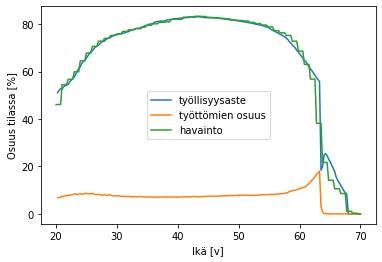

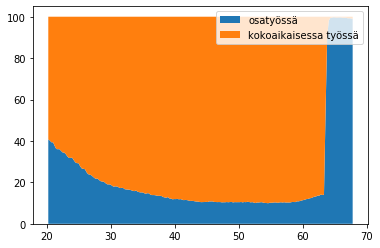

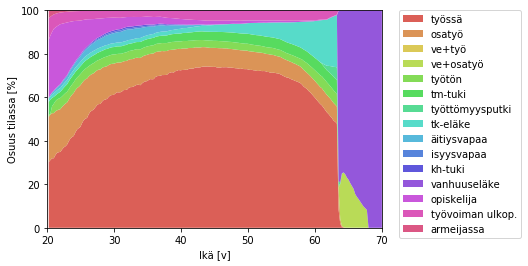

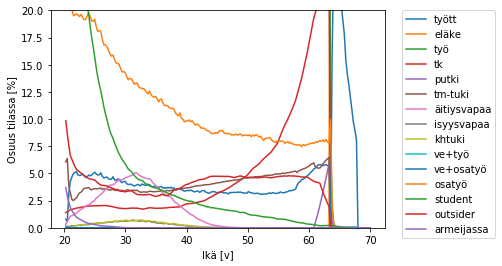

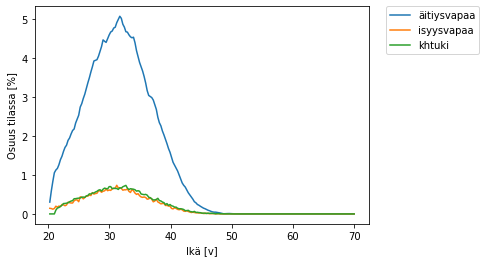

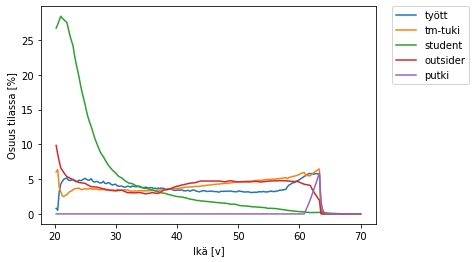

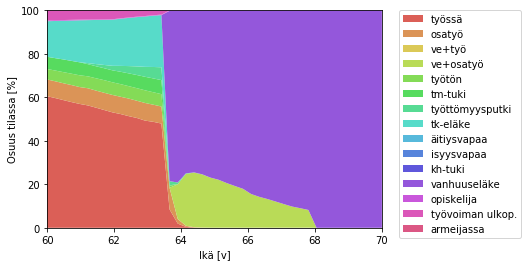

lisäpäivillä on 6233.091506160246 henkilöä


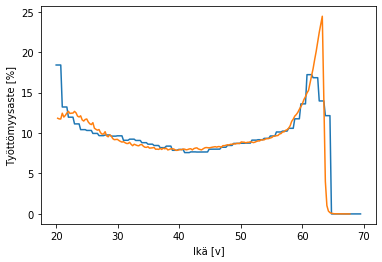

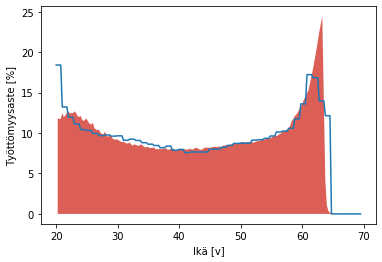

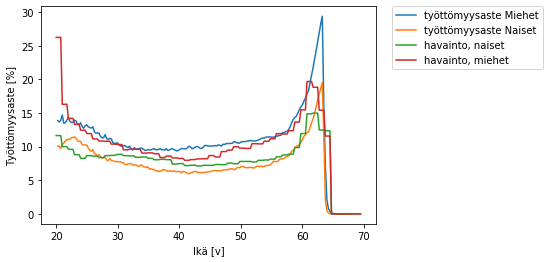

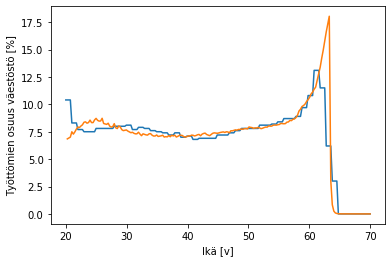

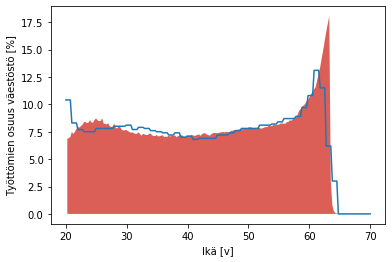

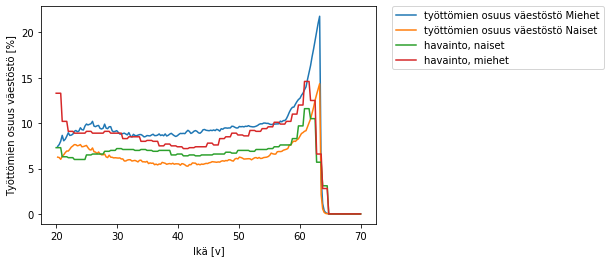

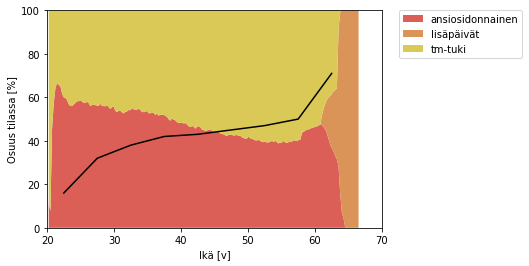

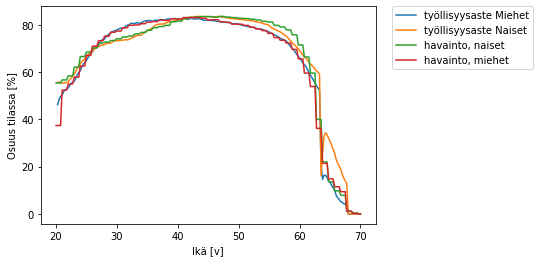

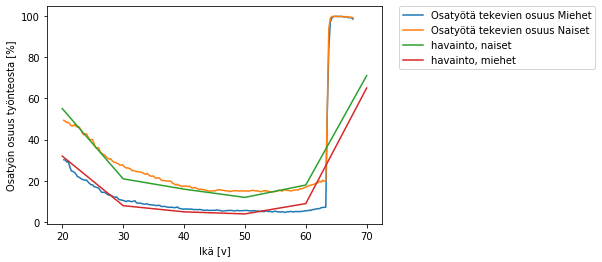

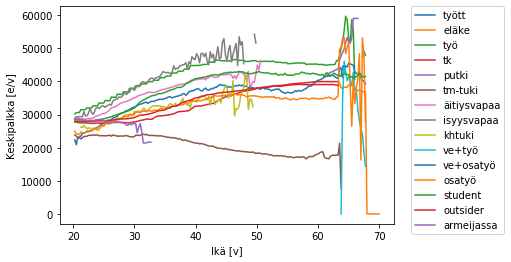

Jakauma ansiosidonnainen+tmtuki+putki, no max age


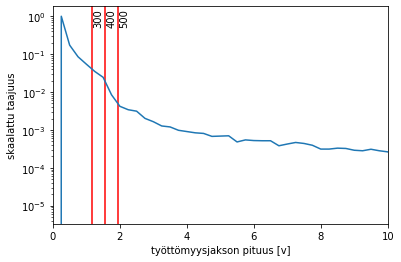

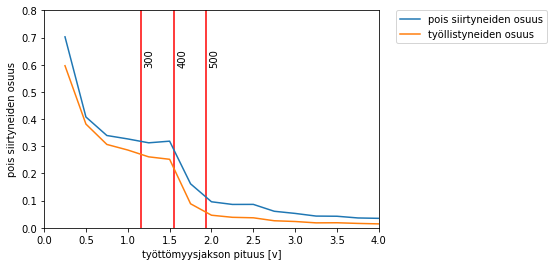

Jakauma ansiosidonnainen+tmtuki+putki, jakso päättynyt ennen 50v ikää


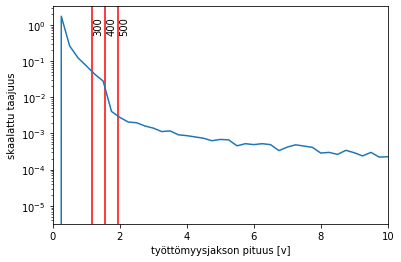

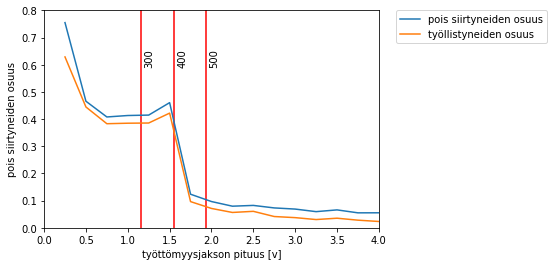

Jakauma ansiosidonnainen+putki, jakso päättynyt ennen 50v ikää, jäljellä oleva aika


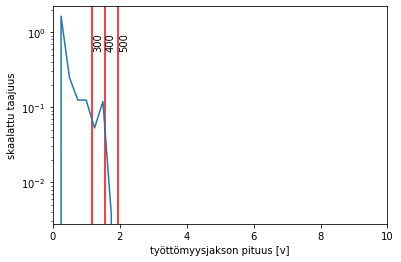

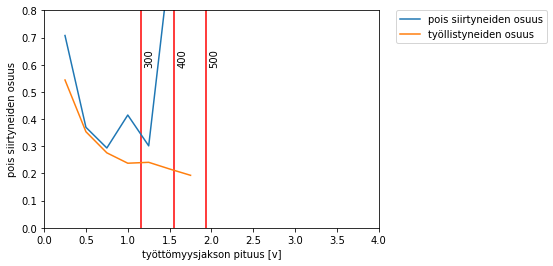

Jakauma tmtuki


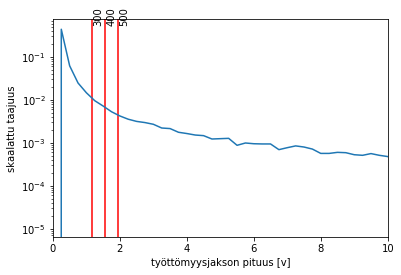

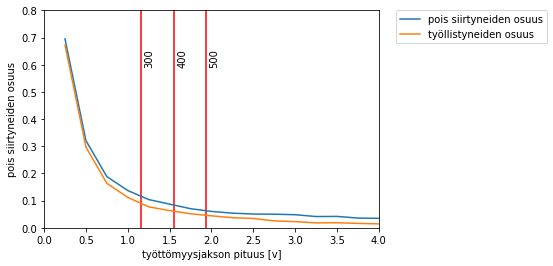

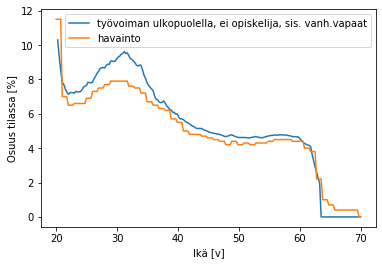

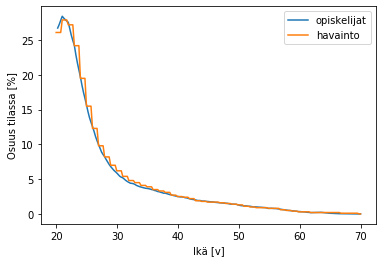

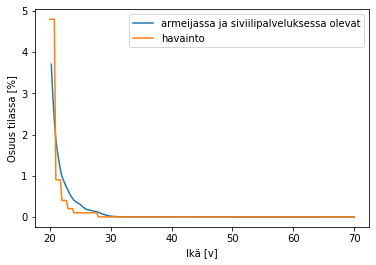

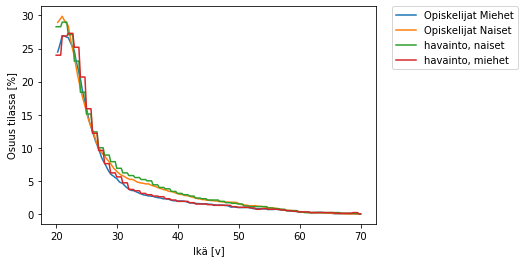

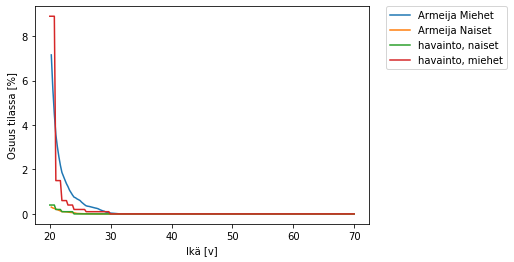

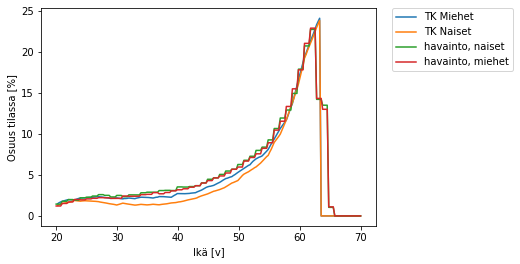

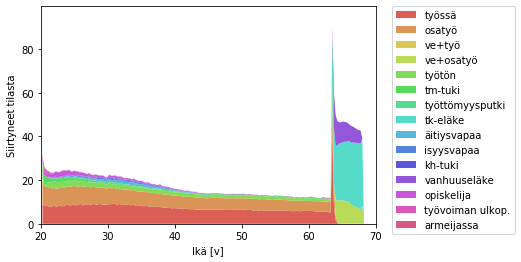

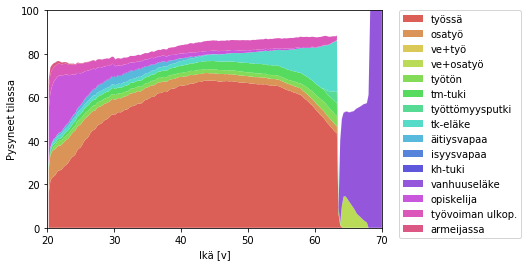

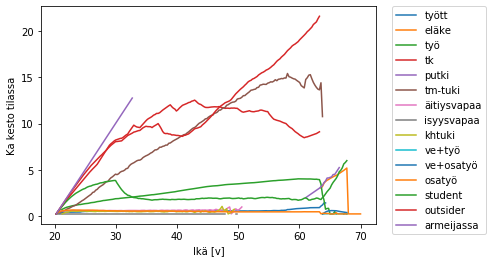

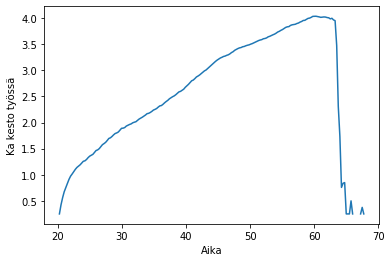

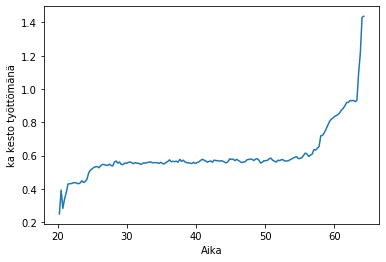

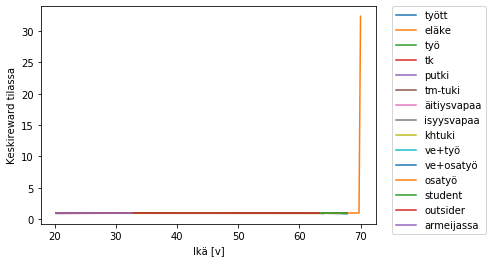

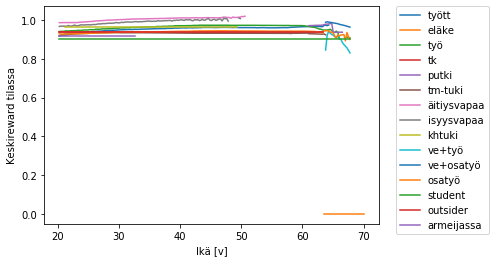

No handles with labels found to put in legend.


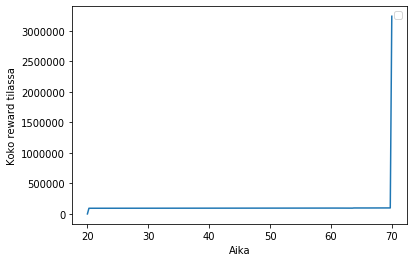

yhteensä reward 224.0872567587761


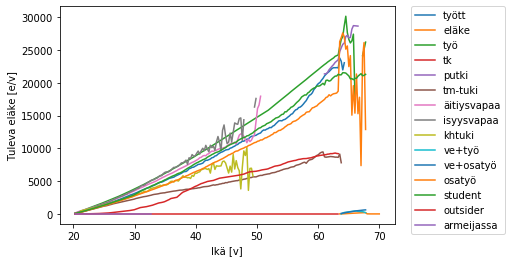

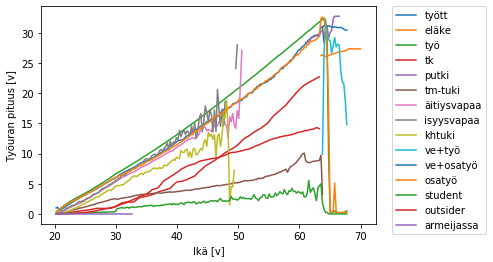

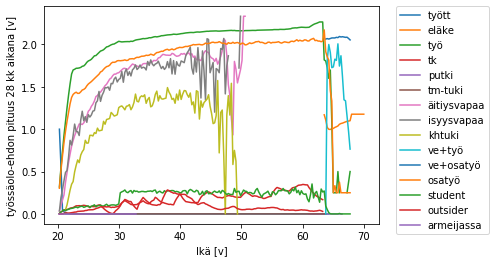

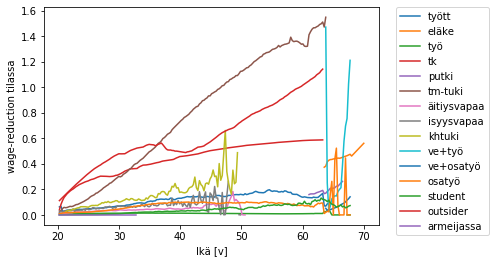

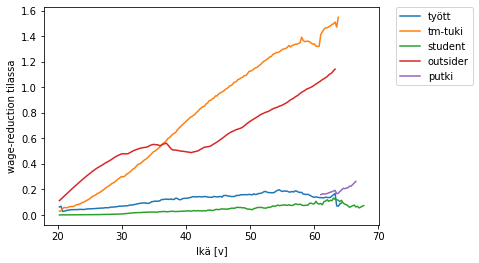

In [5]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
start_from=perusmalli
start_from='best/malli_verrokki'
cc2.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_verrokki',plot=True,
                results='results/malli_perus_final',start_from=start_from,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
#cc2_porras.render(load='results/steps_verrokki')



In [9]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2.load_sim(load='results/malli_perus_final')
#cc2.compare_with(cc1,label='verrokki')

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



# Politiikkavaihtoehtolaskelmia

Seuraavassa on toteutettu kokoelma politiikkavaihtoehtoja. Näiden laskeminen ei tuota arvioita ennen kuin perusmalli konvergoi stabiilisti,

## Porrastettu työttömyysturva



In [4]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2_porras.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_steps',plot=False,
                results='results/steps_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc2_porras.render(load='results/steps_results')


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

train...
phase 1


KeyboardInterrupt: 

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



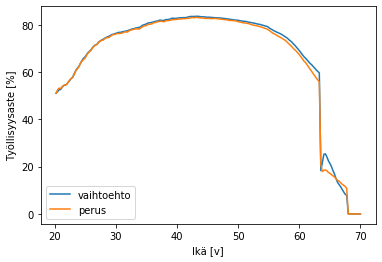

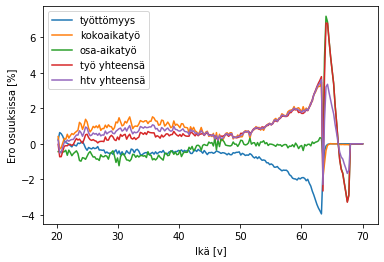

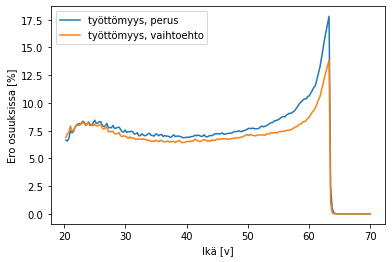

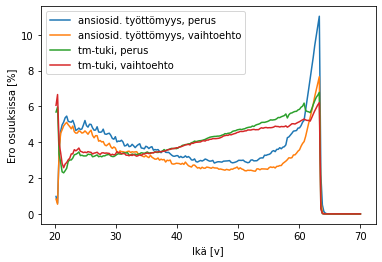

Työllisyysvaikutus 21-63-vuotiaisiin noin 26069 htv ja 20902 työllistä
Työllisyysastevaikutus 21-63-vuotiailla noin 0.71 prosenttia (76.19 vs 75.47)
epävarmuus työllisyysasteissa 0.0062, hajonta 0.0785


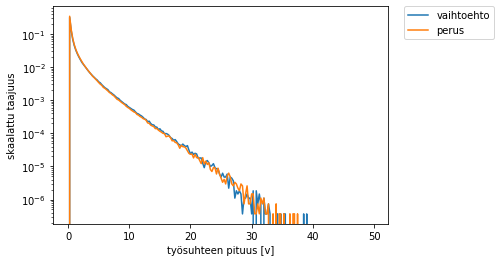

Jakauma ansiosidonnainen+tmtuki+putki, no max age
Perus keskikesto 0.6774152873147057 v porrastus Keskikesto 0.6943269893487021 v
Perus lkm 477821 v porrastus lkm 472994 v
Perus työtpäiviä yht 323683.25 v porrastus työtpäiviä yht 328412.5 v


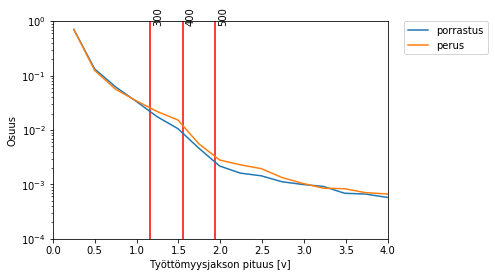

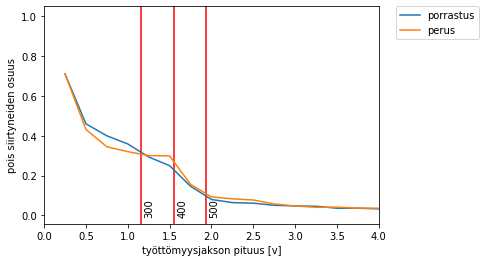

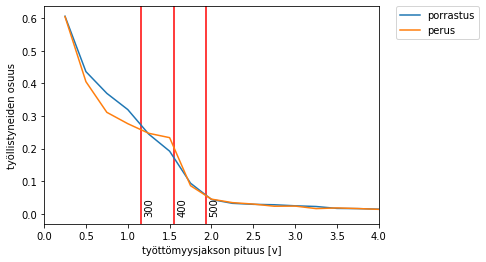

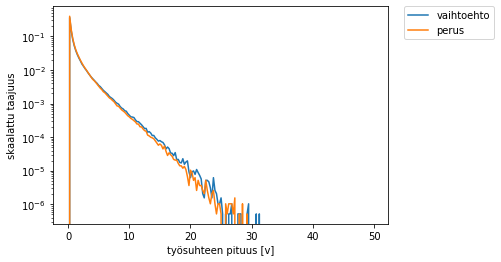

Jakauma ansiosidonnainen+tmtuki+putki, max age 54
Perus keskikesto 0.4365517701099274 v porrastus Keskikesto 0.44009814535407765 v
Perus lkm 412545 v porrastus lkm 408272 v
Perus työtpäiviä yht 180097.25 v porrastus työtpäiviä yht 179679.75 v


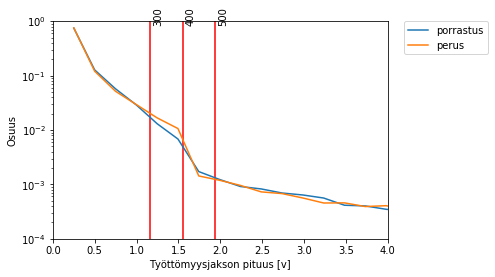

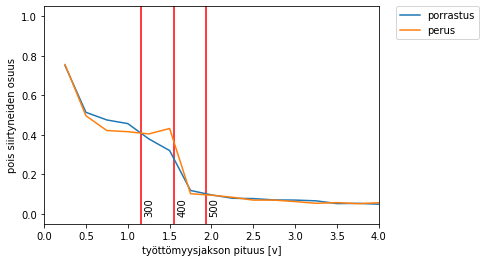

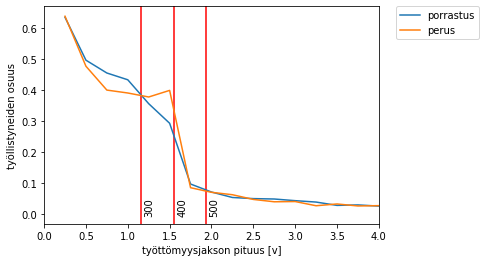

In [5]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2_porras.load_sim(load='results/steps_results')
cc2_porras.compare_with(cc1,label='porrastus')

## Työttömyysputken poisto

Työttömyysputkelle meneminen on usein hyvin suosittua elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1766     |
| nupdates           | 1        |
| policy_entropy     | 0.99     |
| policy_loss        | -0.00238 |
| total_timesteps    | 0        |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.656    |
| fps                | 3192     |
| nupdates           | 10       |
| policy_entropy     | 1.03     |
| policy_loss        | -1.29    |
| total_timesteps    | 21825    |
| value_loss         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2676     |
| nupdates           | 260      |
| policy_entropy     | 1        |
| policy_loss        | -0.0064  |
| total_timesteps    | 628075   |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2676     |
| nupdates           | 270      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0131  |
| total_timesteps    | 652325   |
| value_loss         | 0.0181   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2675     |
| nupdates           | 280      |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00307 |
| total_timesteps    | 676575   |
| value_loss         | 0.0185   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.989    |
| fps                | 2670     |
| nupdates           | 530      |
| policy_entropy     | 1.04     |
| policy_loss        | 0.0116   |
| total_timesteps    | 1282825  |
| value_loss         | 0.136    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2670     |
| nupdates           | 540      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0281  |
| total_timesteps    | 1307075  |
| value_loss         | 0.12     |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2670     |
| nupdates           | 550      |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0137  |
| total_timesteps    | 1331325  |
| value_loss         | 0.0249   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2674     |
| nupdates           | 800      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00599 |
| total_timesteps    | 1937575  |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2674     |
| nupdates           | 810      |
| policy_entropy     | 0.982    |
| policy_loss        | -0.00745 |
| total_timesteps    | 1961825  |
| value_loss         | 0.0161   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2674     |
| nupdates           | 820      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00883 |
| total_timesteps    | 1986075  |
| value_loss         | 0.0318   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2680     |
| nupdates           | 1070     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0382  |
| total_timesteps    | 2592325  |
| value_loss         | 0.0462   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2680     |
| nupdates           | 1080     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0194  |
| total_timesteps    | 2616575  |
| value_loss         | 0.0245   |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2680     |
| nupdates           | 1090     |
| policy_entropy     | 0.988    |
| policy_loss        | 0.00656  |
| total_timesteps    | 2640825  |
| value_loss         | 0.125    |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2685     |
| nupdates           | 1340     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0171  |
| total_timesteps    | 3247075  |
| value_loss         | 0.0498   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2685     |
| nupdates           | 1350     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.00078 |
| total_timesteps    | 3271325  |
| value_loss         | 0.0403   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2685     |
| nupdates           | 1360     |
| policy_entropy     | 0.997    |
| policy_loss        | 0.00257  |
| total_timesteps    | 3295575  |
| value_loss         | 0.062    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2689     |
| nupdates           | 1610     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0417  |
| total_timesteps    | 3901825  |
| value_loss         | 0.0215   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2690     |
| nupdates           | 1620     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0106  |
| total_timesteps    | 3926075  |
| value_loss         | 0.0301   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2690     |
| nupdates           | 1630     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00769 |
| total_timesteps    | 3950325  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2694     |
| nupdates           | 1880     |
| policy_entropy     | 0.998    |
| policy_loss        | 0.00406  |
| total_timesteps    | 4556575  |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2694     |
| nupdates           | 1890     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00451 |
| total_timesteps    | 4580825  |
| value_loss         | 0.0124   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2694     |
| nupdates           | 1900     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0212  |
| total_timesteps    | 4605075  |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2697     |
| nupdates           | 2150     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0246  |
| total_timesteps    | 5211325  |
| value_loss         | 0.0544   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2697     |
| nupdates           | 2160     |
| policy_entropy     | 1        |
| policy_loss        | -0.0017  |
| total_timesteps    | 5235575  |
| value_loss         | 0.0213   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2697     |
| nupdates           | 2170     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0351  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0126   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2700     |
| nupdates           | 2420     |
| policy_entropy     | 0.975    |
| policy_loss        | -0.00795 |
| total_timesteps    | 5866075  |
| value_loss         | 0.00875  |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2700      |
| nupdates           | 2430      |
| policy_entropy     | 0.986     |
| policy_loss        | -0.000887 |
| total_timesteps    | 5890325   |
| value_loss         | 0.01      |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2700     |
| nupdates           | 2440     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0216  |
| total_timesteps    | 5914575  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2703     |
| nupdates           | 2690     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00496 |
| total_timesteps    | 6520825  |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2703     |
| nupdates           | 2700     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0282  |
| total_timesteps    | 6545075  |
| value_loss         | 0.0152   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2702     |
| nupdates           | 2710     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00456 |
| total_timesteps    | 6569325  |
| value_loss         | 0.0141   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2703     |
| nupdates           | 2960     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.0238  |
| total_timesteps    | 7175575  |
| value_loss         | 0.0218   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2703     |
| nupdates           | 2970     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0132  |
| total_timesteps    | 7199825  |
| value_loss         | 0.02     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2703     |
| nupdates           | 2980     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.0073  |
| total_timesteps    | 7224075  |
| value_loss         | 0.00653  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2702     |
| nupdates           | 3230     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.0196  |
| total_timesteps    | 7830325  |
| value_loss         | 0.0296   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2702     |
| nupdates           | 3240     |
| policy_entropy     | 0.931    |
| policy_loss        | -0.0117  |
| total_timesteps    | 7854575  |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2702     |
| nupdates           | 3250     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0233  |
| total_timesteps    | 7878825  |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2700     |
| nupdates           | 3500     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0269  |
| total_timesteps    | 8485075  |
| value_loss         | 0.00689  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2700     |
| nupdates           | 3510     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0109  |
| total_timesteps    | 8509325  |
| value_loss         | 0.00879  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2700     |
| nupdates           | 3520     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0134  |
| total_timesteps    | 8533575  |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

----------------------------------
| explained_variance | 0.999     |
| fps                | 2694      |
| nupdates           | 3770      |
| policy_entropy     | 0.996     |
| policy_loss        | -0.000516 |
| total_timesteps    | 9139825   |
| value_loss         | 0.00651   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2693     |
| nupdates           | 3780     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0191  |
| total_timesteps    | 9164075  |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2693     |
| nupdates           | 3790     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.00946 |
| total_timesteps    | 9188325  |
| value_loss         | 0.00825  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2685     |
| nupdates           | 4040     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0176  |
| total_timesteps    | 9794575  |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2685     |
| nupdates           | 4050     |
| policy_entropy     | 1.07     |
| policy_loss        | 0.00167  |
| total_timesteps    | 9818825  |
| value_loss         | 0.0089   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2685     |
| nupdates           | 4060     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.023   |
| total_timesteps    | 9843075  |
| value_loss         | 0.00801  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2674     |
| nupdates           | 4310     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0347  |
| total_timesteps    | 10449325 |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2674     |
| nupdates           | 4320     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00711 |
| total_timesteps    | 10473575 |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2673     |
| nupdates           | 4330     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0183  |
| total_timesteps    | 10497825 |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2660     |
| nupdates           | 4580     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00927 |
| total_timesteps    | 11104075 |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2660     |
| nupdates           | 4590     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00969 |
| total_timesteps    | 11128325 |
| value_loss         | 0.00786  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2659     |
| nupdates           | 4600     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0112  |
| total_timesteps    | 11152575 |
| value_loss         | 0.00497  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2645     |
| nupdates           | 4850     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0107  |
| total_timesteps    | 11758825 |
| value_loss         | 0.0139   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2644     |
| nupdates           | 4860     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00156 |
| total_timesteps    | 11783075 |
| value_loss         | 0.0248   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2644     |
| nupdates           | 4870     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.015   |
| total_timesteps    | 11807325 |
| value_loss         | 0.017    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2629     |
| nupdates           | 5120     |
| policy_entropy     | 0.98     |
| policy_loss        | -0.0251  |
| total_timesteps    | 12413575 |
| value_loss         | 0.0137   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2628     |
| nupdates           | 5130     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0105  |
| total_timesteps    | 12437825 |
| value_loss         | 0.0216   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2628     |
| nupdates           | 5140     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.00822 |
| total_timesteps    | 12462075 |
| value_loss         | 0.00723  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2614     |
| nupdates           | 5390     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00709 |
| total_timesteps    | 13068325 |
| value_loss         | 0.00775  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2614     |
| nupdates           | 5400     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0127  |
| total_timesteps    | 13092575 |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2613     |
| nupdates           | 5410     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0371  |
| total_timesteps    | 13116825 |
| value_loss         | 0.011    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

----------------------------------
| explained_variance | 0.999     |
| fps                | 2601      |
| nupdates           | 5660      |
| policy_entropy     | 0.991     |
| policy_loss        | -0.000815 |
| total_timesteps    | 13723075  |
| value_loss         | 0.00742   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2600     |
| nupdates           | 5670     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0106  |
| total_timesteps    | 13747325 |
| value_loss         | 0.00938  |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2600      |
| nupdates           | 5680      |
| policy_entropy     | 0.961     |
| policy_loss        | -0.000412 |
| total_timesteps    | 13771575  |
| value_loss         | 0.00711   |
----------------------------------
---------------------------------
| explained_variance | 0.999  

---------------------------------
| explained_variance | 0.999    |
| fps                | 2588     |
| nupdates           | 5930     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0304  |
| total_timesteps    | 14377825 |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2587     |
| nupdates           | 5940     |
| policy_entropy     | 1.04     |
| policy_loss        | 0.00659  |
| total_timesteps    | 14402075 |
| value_loss         | 0.00723  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2587     |
| nupdates           | 5950     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0164  |
| total_timesteps    | 14426325 |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2575     |
| nupdates           | 6200     |
| policy_entropy     | 0.971    |
| policy_loss        | -0.0189  |
| total_timesteps    | 15032575 |
| value_loss         | 0.00998  |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2575     |
| nupdates           | 6210     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0105  |
| total_timesteps    | 15056825 |
| value_loss         | 0.053    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2575     |
| nupdates           | 6220     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00426 |
| total_timesteps    | 15081075 |
| value_loss         | 0.0111   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2564     |
| nupdates           | 6470     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00511 |
| total_timesteps    | 15687325 |
| value_loss         | 0.00886  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2564     |
| nupdates           | 6480     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.00819 |
| total_timesteps    | 15711575 |
| value_loss         | 0.00616  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2563     |
| nupdates           | 6490     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0189  |
| total_timesteps    | 15735825 |
| value_loss         | 0.00863  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2550     |
| nupdates           | 6740     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.0078   |
| total_timesteps    | 16342075 |
| value_loss         | 0.00714  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2550     |
| nupdates           | 6750     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0264  |
| total_timesteps    | 16366325 |
| value_loss         | 0.0125   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2549     |
| nupdates           | 6760     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.000668 |
| total_timesteps    | 16390575 |
| value_loss         | 0.0081   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2534     |
| nupdates           | 7010     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0126  |
| total_timesteps    | 16996825 |
| value_loss         | 0.00808  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2533     |
| nupdates           | 7020     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0143  |
| total_timesteps    | 17021075 |
| value_loss         | 0.00824  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2532     |
| nupdates           | 7030     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00285  |
| total_timesteps    | 17045325 |
| value_loss         | 0.00621  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2514     |
| nupdates           | 7280     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00147 |
| total_timesteps    | 17651575 |
| value_loss         | 0.00749  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2513     |
| nupdates           | 7290     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00685 |
| total_timesteps    | 17675825 |
| value_loss         | 0.01     |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2512     |
| nupdates           | 7300     |
| policy_entropy     | 1        |
| policy_loss        | -0.00686 |
| total_timesteps    | 17700075 |
| value_loss         | 0.00851  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2492     |
| nupdates           | 7550     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00734 |
| total_timesteps    | 18306325 |
| value_loss         | 0.00609  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2492     |
| nupdates           | 7560     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0241  |
| total_timesteps    | 18330575 |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2491     |
| nupdates           | 7570     |
| policy_entropy     | 0.988    |
| policy_loss        | -0.00589 |
| total_timesteps    | 18354825 |
| value_loss         | 0.00769  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2476     |
| nupdates           | 7820     |
| policy_entropy     | 0.979    |
| policy_loss        | -0.00903 |
| total_timesteps    | 18961075 |
| value_loss         | 0.00525  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2476     |
| nupdates           | 7830     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.00695 |
| total_timesteps    | 18985325 |
| value_loss         | 0.00543  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2475     |
| nupdates           | 7840     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0277  |
| total_timesteps    | 19009575 |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2461     |
| nupdates           | 8090     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0161  |
| total_timesteps    | 19615825 |
| value_loss         | 0.00687  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2461     |
| nupdates           | 8100     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0066  |
| total_timesteps    | 19640075 |
| value_loss         | 0.00542  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2460     |
| nupdates           | 8110     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0279  |
| total_timesteps    | 19664325 |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2448     |
| nupdates           | 8360     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00613 |
| total_timesteps    | 20270575 |
| value_loss         | 0.00632  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2447     |
| nupdates           | 8370     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.005   |
| total_timesteps    | 20294825 |
| value_loss         | 0.0061   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2447     |
| nupdates           | 8380     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0314  |
| total_timesteps    | 20319075 |
| value_loss         | 0.015    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2435     |
| nupdates           | 8630     |
| policy_entropy     | 1.05     |
| policy_loss        | 0.0031   |
| total_timesteps    | 20925325 |
| value_loss         | 0.00625  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2434     |
| nupdates           | 8640     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0155  |
| total_timesteps    | 20949575 |
| value_loss         | 0.00698  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2434     |
| nupdates           | 8650     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.0168  |
| total_timesteps    | 20973825 |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2423     |
| nupdates           | 8900     |
| policy_entropy     | 1.04     |
| policy_loss        | 0.000738 |
| total_timesteps    | 21580075 |
| value_loss         | 0.00639  |
---------------------------------
----------------------------------
| explained_variance | 1         |
| fps                | 2423      |
| nupdates           | 8910      |
| policy_entropy     | 0.974     |
| policy_loss        | -0.000166 |
| total_timesteps    | 21604325  |
| value_loss         | 0.005     |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2422     |
| nupdates           | 8920     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0092  |
| total_timesteps    | 21628575 |
| value_loss         | 0.00857  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2415     |
| nupdates           | 9170     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0209  |
| total_timesteps    | 22234825 |
| value_loss         | 0.00726  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2415     |
| nupdates           | 9180     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0162  |
| total_timesteps    | 22259075 |
| value_loss         | 0.00729  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2415     |
| nupdates           | 9190     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0129  |
| total_timesteps    | 22283325 |
| value_loss         | 0.00857  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2408     |
| nupdates           | 9440     |
| policy_entropy     | 1        |
| policy_loss        | -0.00168 |
| total_timesteps    | 22889575 |
| value_loss         | 0.00719  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2407     |
| nupdates           | 9450     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0133  |
| total_timesteps    | 22913825 |
| value_loss         | 0.00622  |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 2407      |
| nupdates           | 9460      |
| policy_entropy     | 0.969     |
| policy_loss        | -0.000502 |
| total_timesteps    | 22938075  |
| value_loss         | 0.00731   |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 2400     |
| nupdates           | 9710     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.014   |
| total_timesteps    | 23544325 |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2399     |
| nupdates           | 9720     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0218  |
| total_timesteps    | 23568575 |
| value_loss         | 0.00806  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2399     |
| nupdates           | 9730     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0191  |
| total_timesteps    | 23592825 |
| value_loss         | 0.0076   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2388     |
| nupdates           | 9980     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00989 |
| total_timesteps    | 24199075 |
| value_loss         | 0.00652  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2388     |
| nupdates           | 9990     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0166  |
| total_timesteps    | 24223325 |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2387     |
| nupdates           | 10000    |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0126  |
| total_timesteps    | 24247575 |
| value_loss         | 0.00663  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2378     |
| nupdates           | 10250    |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00591 |
| total_timesteps    | 24853825 |
| value_loss         | 0.00678  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2378     |
| nupdates           | 10260    |
| policy_entropy     | 1        |
| policy_loss        | -0.0137  |
| total_timesteps    | 24878075 |
| value_loss         | 0.00725  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2377     |
| nupdates           | 10270    |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00122 |
| total_timesteps    | 24902325 |
| value_loss         | 0.00508  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2367     |
| nupdates           | 10520    |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0106  |
| total_timesteps    | 25508575 |
| value_loss         | 0.00925  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2367     |
| nupdates           | 10530    |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0158  |
| total_timesteps    | 25532825 |
| value_loss         | 0.0085   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2367     |
| nupdates           | 10540    |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0109  |
| total_timesteps    | 25557075 |
| value_loss         | 0.0064   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 2360     |
| nupdates           | 10790    |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00737 |
| total_timesteps    | 26163325 |
| value_loss         | 0.00559  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2360     |
| nupdates           | 10800    |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0176  |
| total_timesteps    | 26187575 |
| value_loss         | 0.00656  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2359     |
| nupdates           | 10810    |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0171  |
| total_timesteps    | 26211825 |
| value_loss         | 0.0121   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2352     |
| nupdates           | 11060    |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0216  |
| total_timesteps    | 26818075 |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2352     |
| nupdates           | 11070    |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00666 |
| total_timesteps    | 26842325 |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2352     |
| nupdates           | 11080    |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0103  |
| total_timesteps    | 26866575 |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2348     |
| nupdates           | 11330    |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0073  |
| total_timesteps    | 27472825 |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2348     |
| nupdates           | 11340    |
| policy_entropy     | 0.972    |
| policy_loss        | -0.00677 |
| total_timesteps    | 27497075 |
| value_loss         | 0.00636  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2348     |
| nupdates           | 11350    |
| policy_entropy     | 0.998    |
| policy_loss        | -0.00436 |
| total_timesteps    | 27521325 |
| value_loss         | 0.00797  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2346     |
| nupdates           | 11600    |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0177  |
| total_timesteps    | 28127575 |
| value_loss         | 0.00811  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2346     |
| nupdates           | 11610    |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00845 |
| total_timesteps    | 28151825 |
| value_loss         | 0.00574  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2346     |
| nupdates           | 11620    |
| policy_entropy     | 0.982    |
| policy_loss        | -0.0195  |
| total_timesteps    | 28176075 |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2346     |
| nupdates           | 11870    |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0166  |
| total_timesteps    | 28782325 |
| value_loss         | 0.00722  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2346     |
| nupdates           | 11880    |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0257  |
| total_timesteps    | 28806575 |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2346     |
| nupdates           | 11890    |
| policy_entropy     | 1        |
| policy_loss        | -0.0188  |
| total_timesteps    | 28830825 |
| value_loss         | 0.00781  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2347     |
| nupdates           | 12140    |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0153  |
| total_timesteps    | 29437075 |
| value_loss         | 0.00929  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 2347     |
| nupdates           | 12150    |
| policy_entropy     | 1        |
| policy_loss        | 0.00225  |
| total_timesteps    | 29461325 |
| value_loss         | 0.00613  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2347     |
| nupdates           | 12160    |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0195  |
| total_timesteps    | 29485575 |
| value_loss         | 0.00914  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

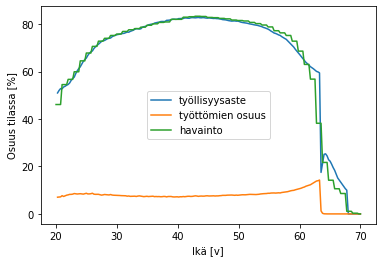

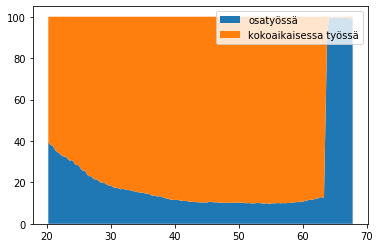

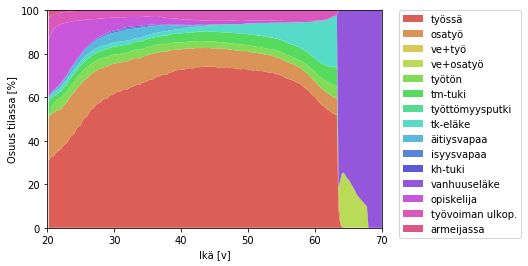

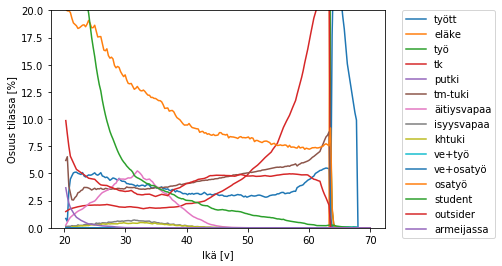

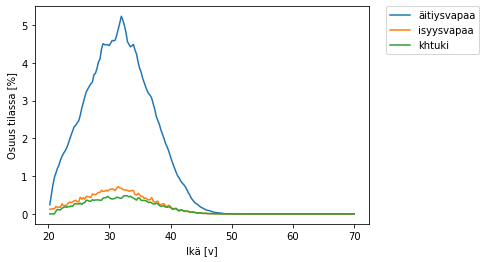

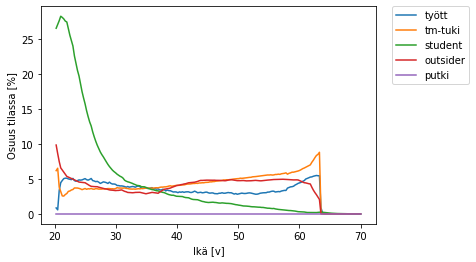

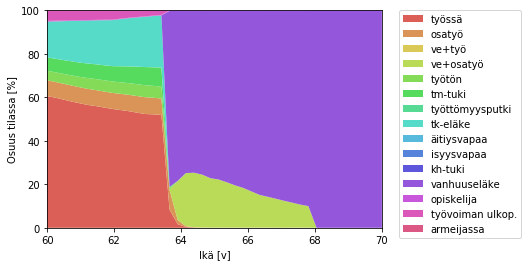

lisäpäivillä on 0.0 henkilöä


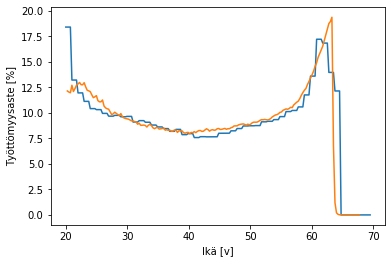

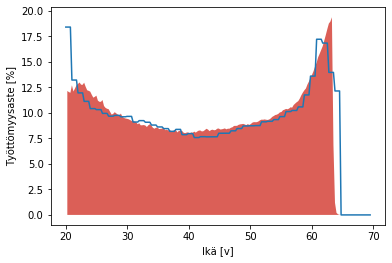

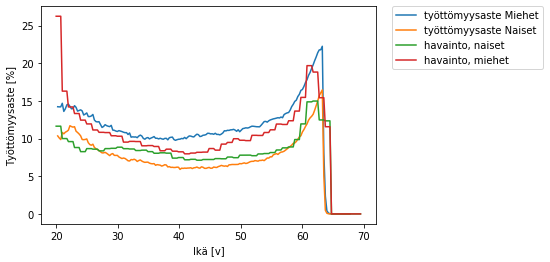

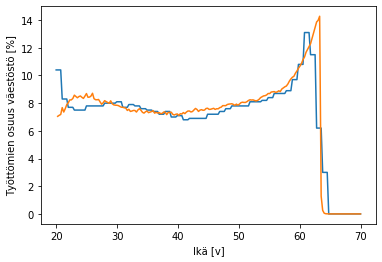

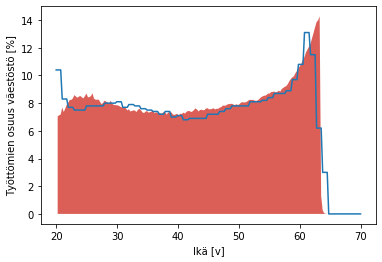

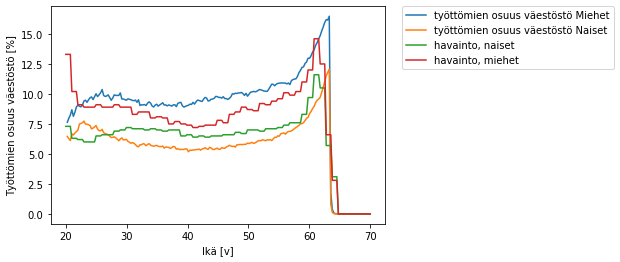

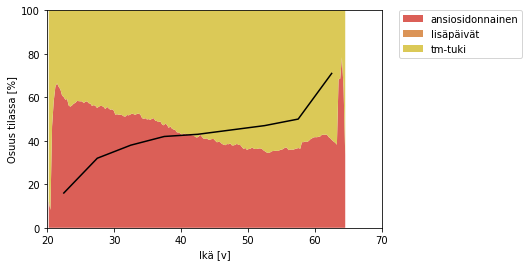

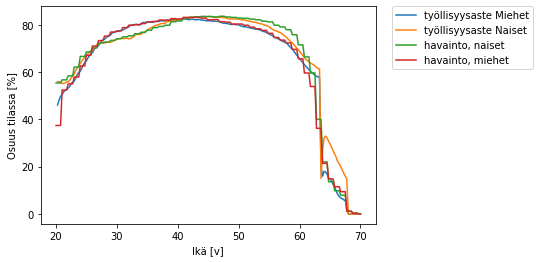

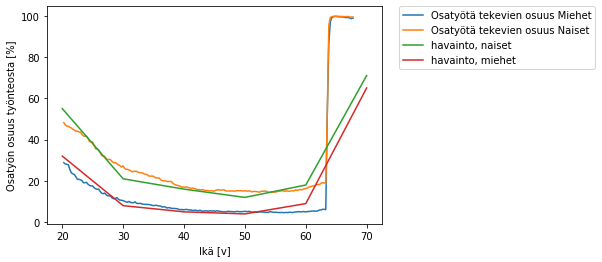

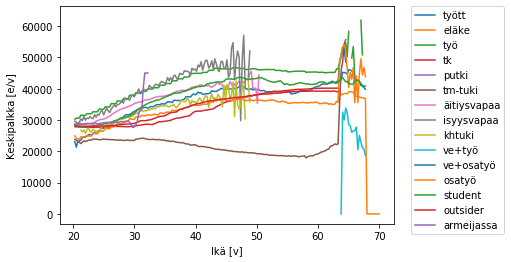

Jakauma ansiosidonnainen+tmtuki+putki, no max age


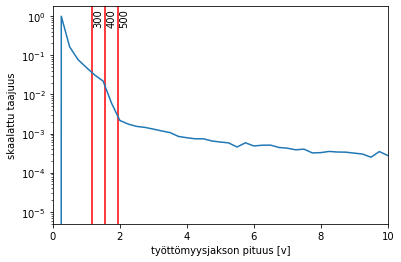

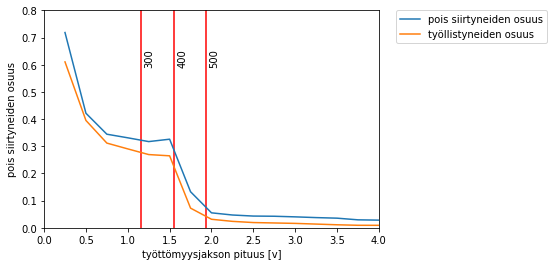

Jakauma ansiosidonnainen+tmtuki+putki, jakso päättynyt ennen 50v ikää


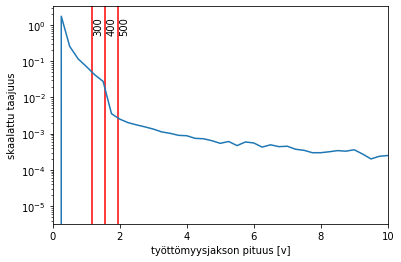

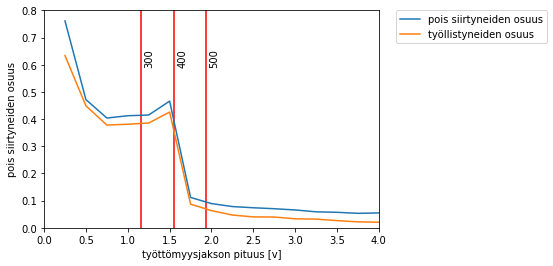

Jakauma ansiosidonnainen+putki, jakso päättynyt ennen 50v ikää, jäljellä oleva aika


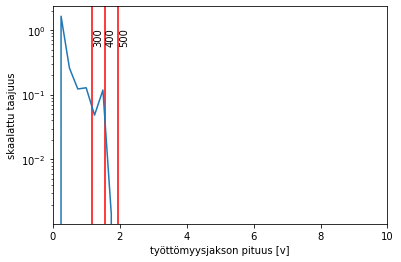

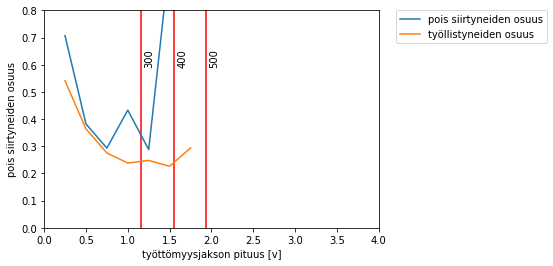

Jakauma tmtuki


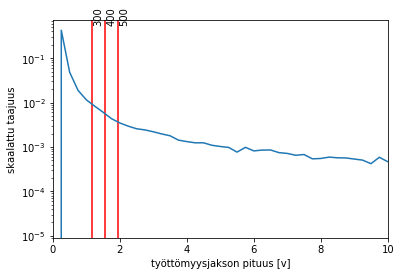

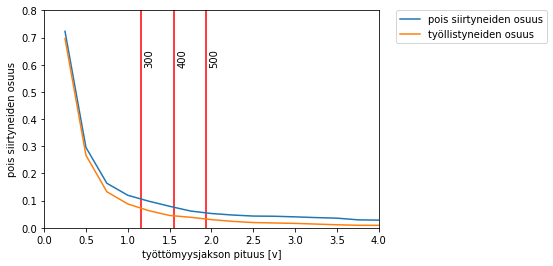

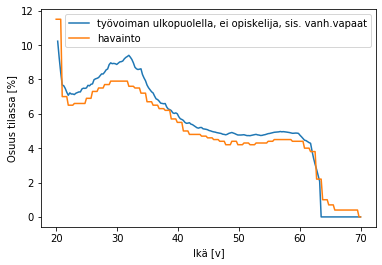

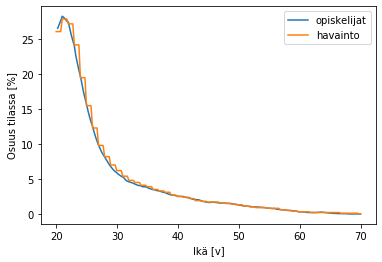

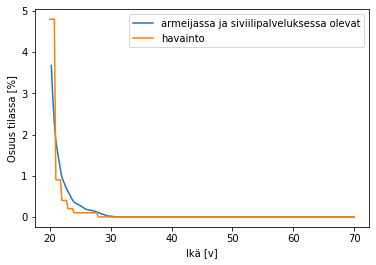

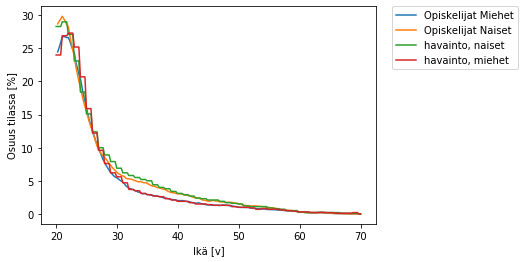

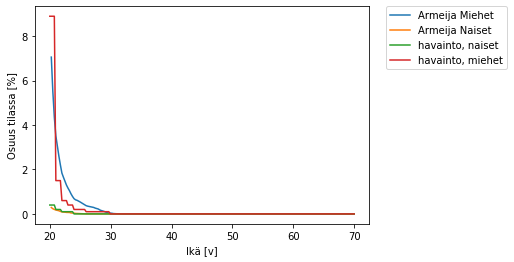

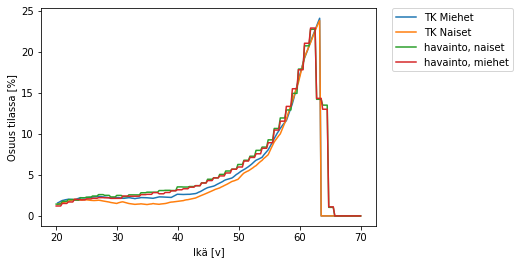

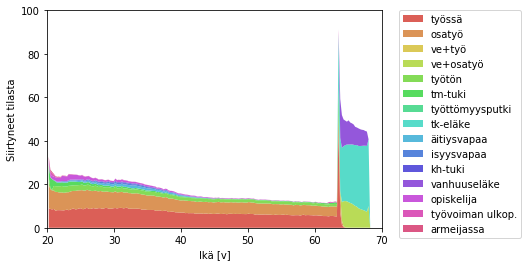

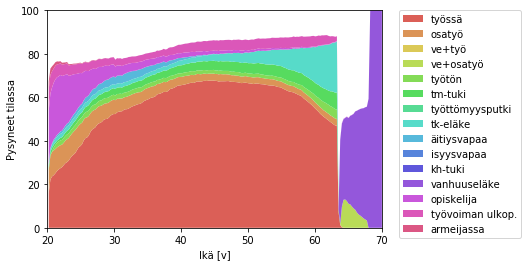

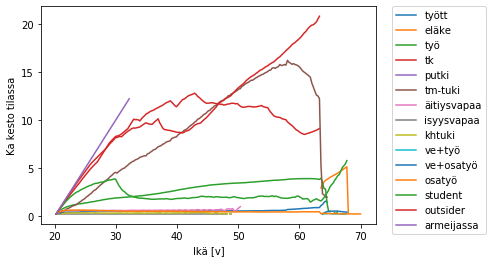

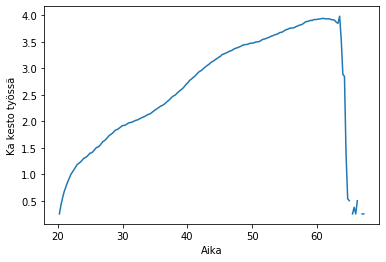

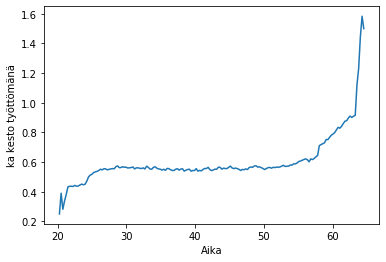

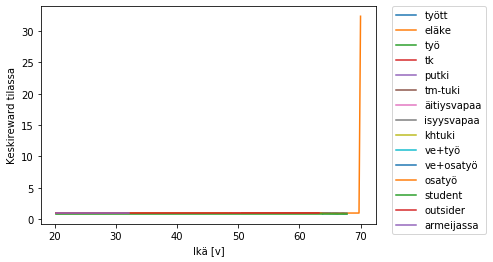

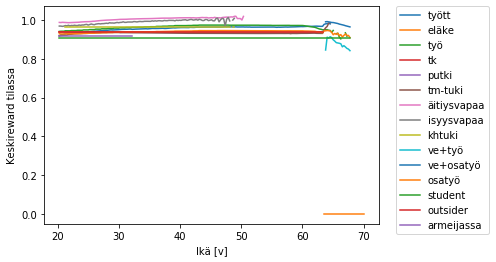

No handles with labels found to put in legend.


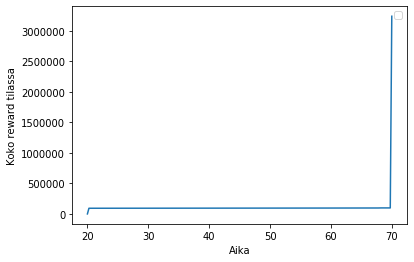

yhteensä reward 224.0745067282822


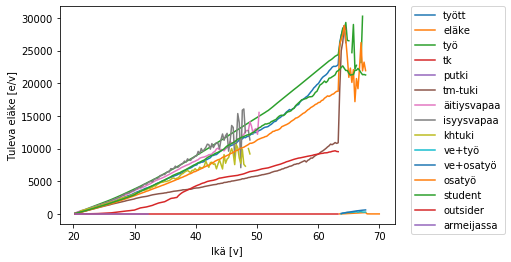

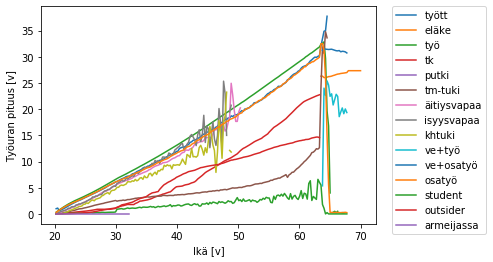

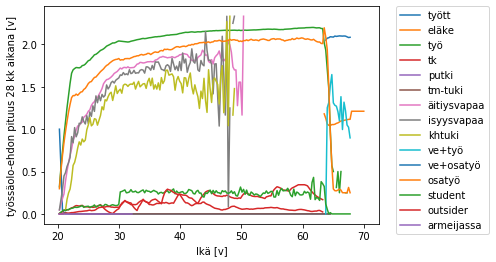

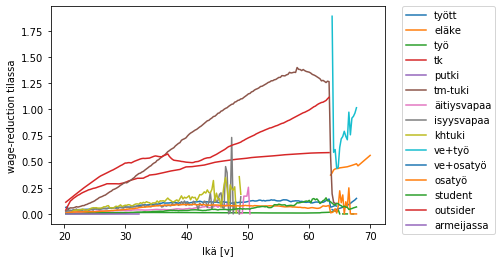

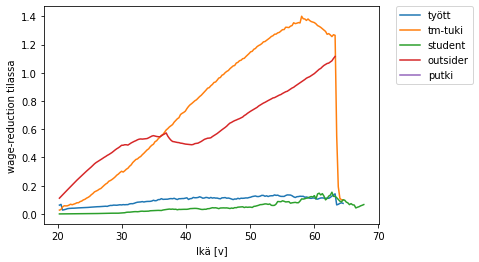

In [9]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                      train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_putki',
                      plot=True,results='results/putki_results',start_from=perusmalli,cont=True,
                      callback_minsteps=callback_minsteps,twostage=twostage)


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

Rahavirrat skaalattuna väestötasolle
+------------------+---------+--------------+-------+
|                  |   perus |   vaihtoehto |   ero |
|------------------+---------+--------------+-------|
| palkkatulo       |    0.00 |         0.00 |  0.00 |
| etuusmeno        |    0.00 |         0.00 |  0.00 |
| verot            |    0.00 |         0.00 |  0.00 |
| valtionvero      |    0.00 |         0.00 |  0.00 |
| kunnallisvero    |    0.00 |         0.00 |  0.00 |
| ptel             |    0.00 |         0.00 |  0.00 |
| tyotvakmaksu     |    0.00 |         0.00 |  0.00 |
| ansiopvraha      |    0.00 |         0.00 |  0.00 |
| asum

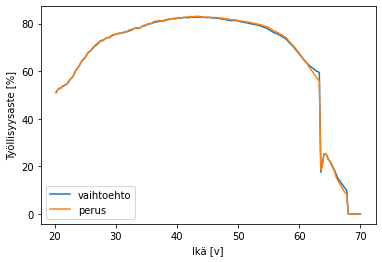

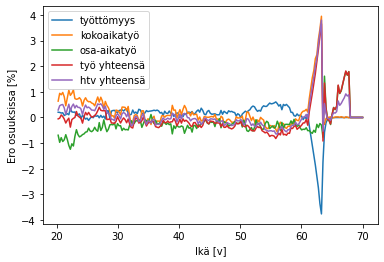

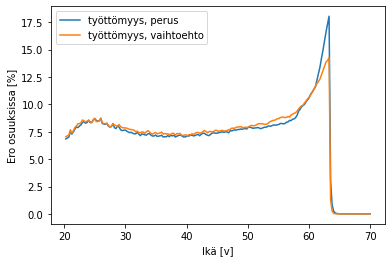

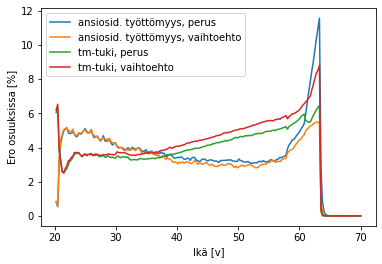

Työllisyysvaikutus 21-63-vuotiaisiin noin 287 htv ja -5032 työllistä
Työllisyysastevaikutus 21-63-vuotiailla noin -0.17 prosenttia (75.21 vs 75.38)
epävarmuus työllisyysasteissa 0.0062, hajonta 0.0790


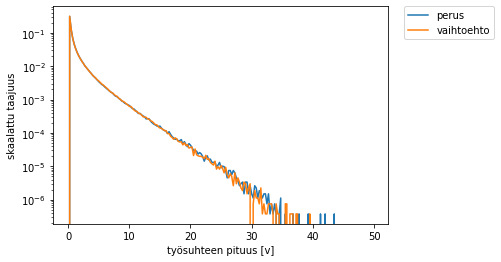

Jakauma ansiosidonnainen+tmtuki+putki, no max age
vaihtoehto keskikesto 0.6996795782261587 v perus Keskikesto 0.7291677451640178 v
Skaalaamaton vaihtoehto lkm 471722 v perus lkm 463608 v
Skaalaamaton vaihtoehto työtpäiviä yht 330054.25 v perus työtpäiviä yht 338048.0 v


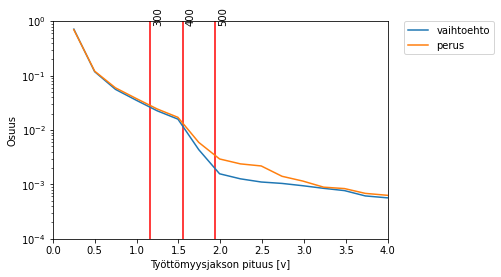

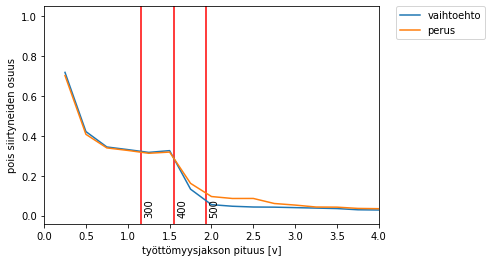

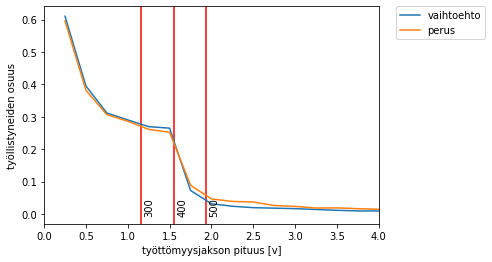

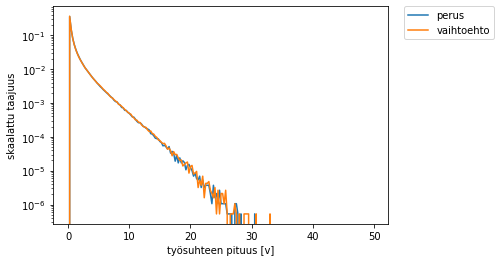

Jakauma ansiosidonnainen+tmtuki+putki, max age 54
vaihtoehto keskikesto 0.45277861795755164 v perus Keskikesto 0.44849218975990746 v
Skaalaamaton vaihtoehto lkm 406659 v perus lkm 401012 v
Skaalaamaton vaihtoehto työtpäiviä yht 184126.5 v perus työtpäiviä yht 179850.75 v


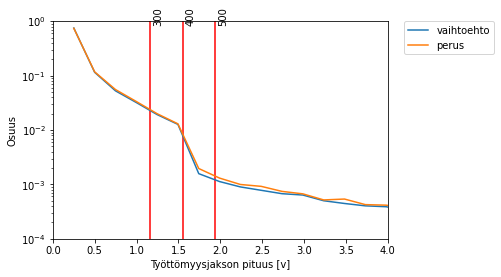

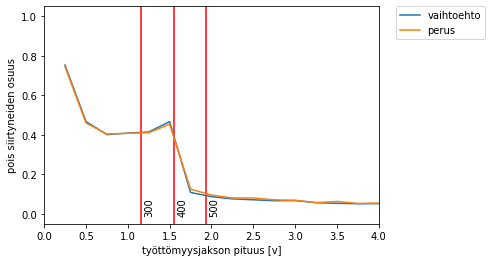

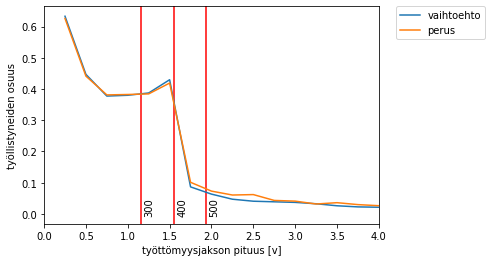

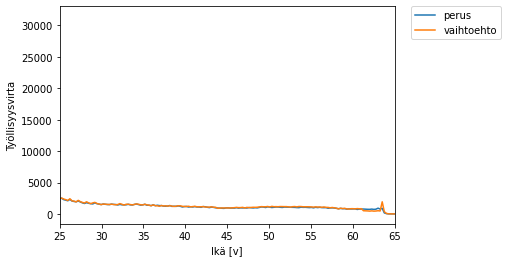

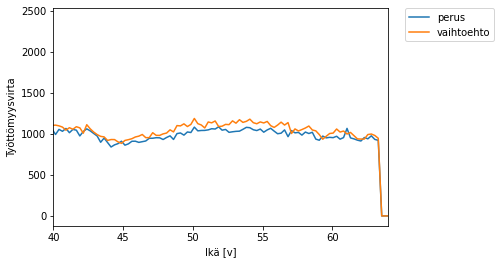

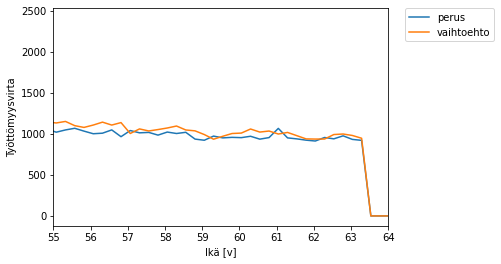

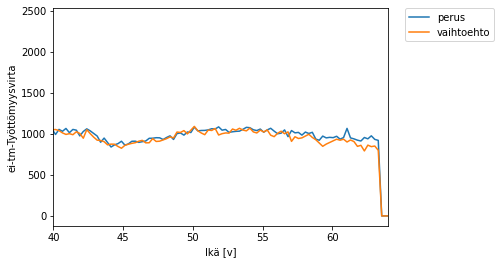

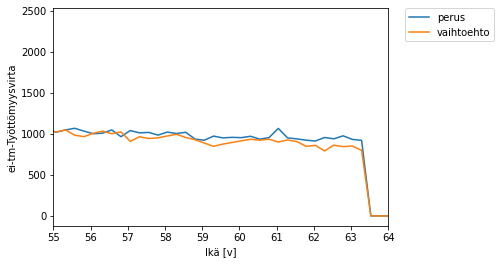

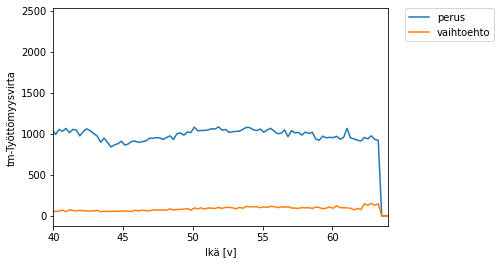

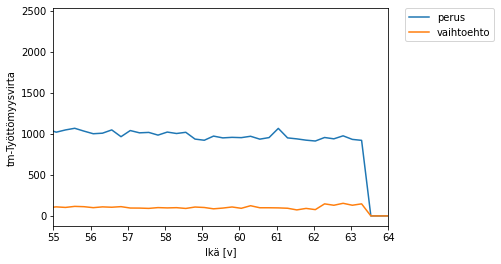

Rahavirrat skaalattuna väestötasolle
+------------------+-------+----------------------+-----------------------+
|                  |   e/v |              toteuma |                   ero |
|------------------+-------+----------------------+-----------------------|
| palkkatulo       |  0.00 | 89,134,200,000.00    | -89,134,200,000.00    |
| etuusmeno        |  0.00 | 36,945,147,749.00    | -36,945,147,749.00    |
| verot            |  0.00 | 30,763,000,000.00    | -30,763,000,000.00    |
| valtionvero      |  0.00 |  5,542,000,000.00    |  -5,542,000,000.00    |
| kunnallisvero    |  0.00 | 18,991,000,000.00    | -18,991,000,000.00    |
| ptel             |  0.00 |  5,560,000,000.00    |  -5,560,000,000.00    |
| tyotvakmaksu     |  0.00 |  1,693,549,800.00    |  -1,693,549,800.00    |
| ansiopvraha      |  0.00 |  3,895,333,045.00    |  -3,895,333,045.00    |
| asumistuki       |  0.00 |  2,089,000,000.00    |  -2,089,000,000.00    |
| tyoelake         |  0.00 | 27,865,000,000.00    |

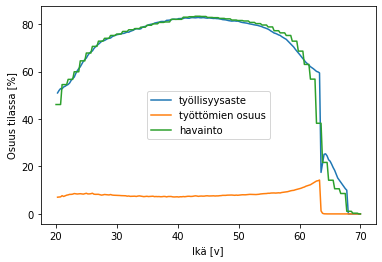

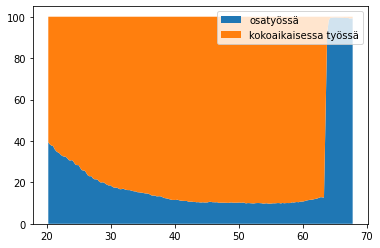

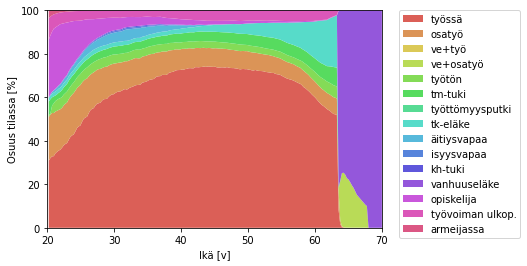

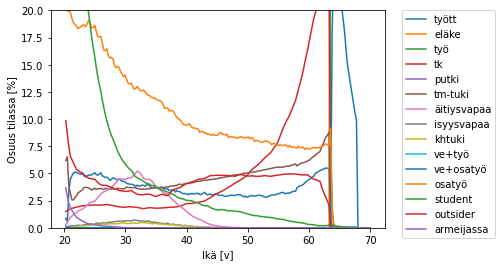

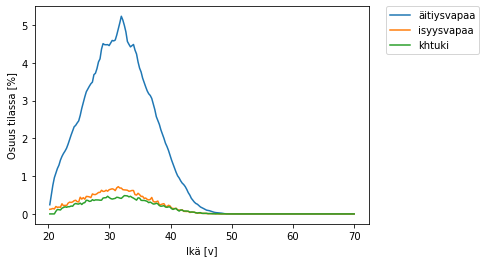

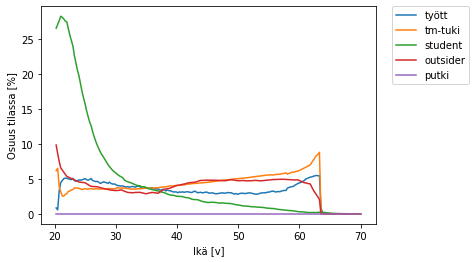

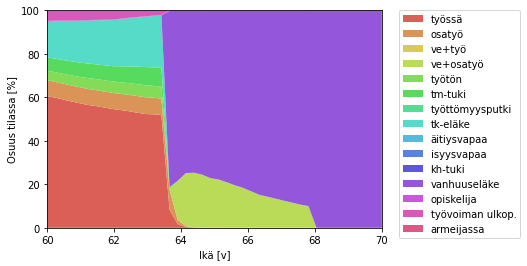

Lisäpäivillä on 0 henkilöä


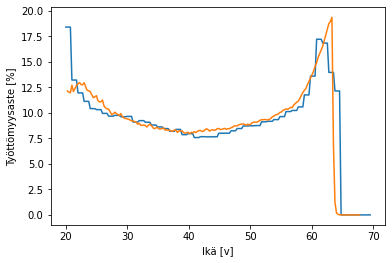

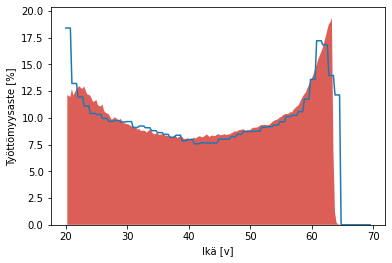

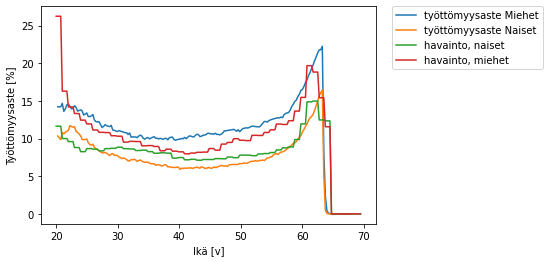

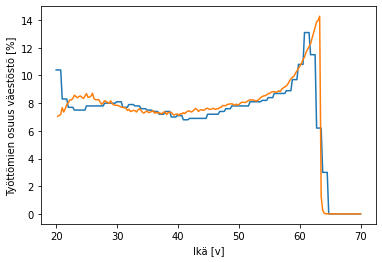

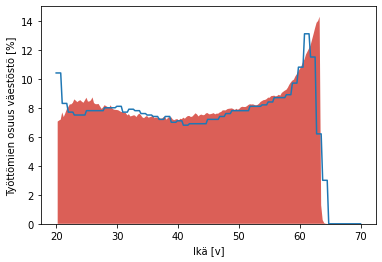

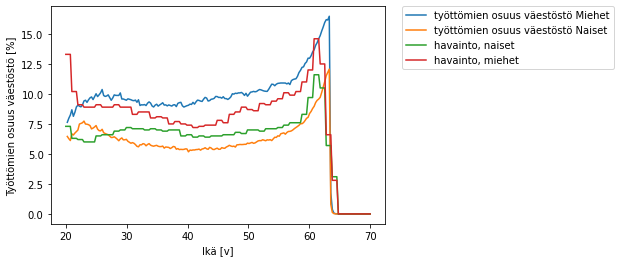

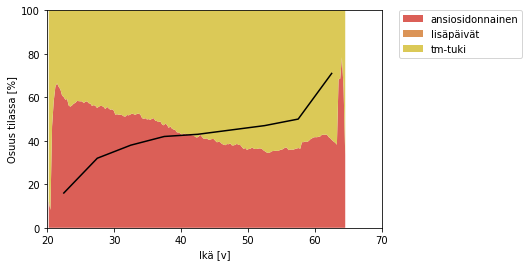

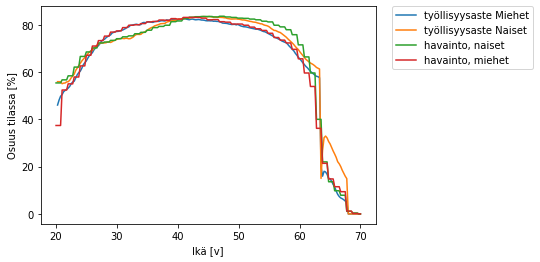

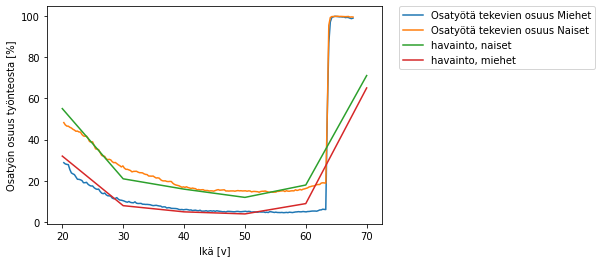

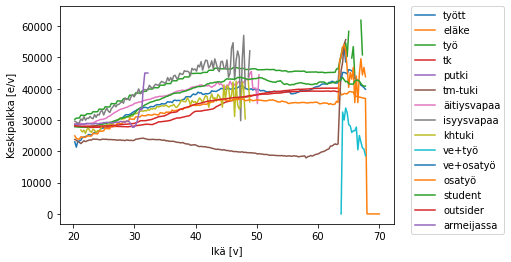

KeyboardInterrupt: 

In [10]:
cc1_putki_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)

cc1_putki_b.load_sim(load='results/putki_results')
cc1_putki_b.compare_with(cc2) 
cc1_putki_b.render()

## EK:n malli

Lasketaan vertailukelpoiset työllisyysasteet EK:n ehdottamalla mallilla. Mallissa on toteuttu muutoksia ansiosidonnaiseen työttömyysturvaan, asumistukeen, toimeentulotukeen ja verotukseen.

In [11]:
cc2=Lifecycle(env='unemploymentEK-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_ek',plot=True,
                results='results/ek_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
#cc2.render(load='results/ek_results')
#cc2.load_sim(load='results/ek_results')
cc2.compare_with(cc1)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 250
ansiopvraha_kesto400 350
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625
training...
---------------------------------
| explained_variance | 0.999    |
| fps                | 1582     |
| nupdates           | 1        |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0146  |
| total_timesteps    |

---------------------------------
| explained_variance | 0.999    |
| fps                | 2603     |
| nupdates           | 250      |
| policy_entropy     | 0.978    |
| policy_loss        | -0.0131  |
| total_timesteps    | 603825   |
| value_loss         | 0.0154   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2606     |
| nupdates           | 260      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0208  |
| total_timesteps    | 628075   |
| value_loss         | 0.0198   |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2606     |
| nupdates           | 270      |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0399  |
| total_timesteps    | 652325   |
| value_loss         | 0.126    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2625     |
| nupdates           | 520      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0202  |
| total_timesteps    | 1258575  |
| value_loss         | 0.0093   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2626     |
| nupdates           | 530      |
| policy_entropy     | 1.02     |
| policy_loss        | 0.000594 |
| total_timesteps    | 1282825  |
| value_loss         | 0.00922  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2626     |
| nupdates           | 540      |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0356  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0147   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

KeyboardInterrupt: 

In [ ]:
cc2=Lifecycle(env='unemploymentEK-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2.load_sim(load='results/ek_results')
cc2.compare_with(cc1)

## Työssäoloehdon pituus 12 kk

Entä jos työssäoloehto olisikin 12 kuukautta pitkä nykyisen 6 kuukauden sijaan?

In [ ]:
cc1_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_toe.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/best_12kk',plot=True,
                    results='results/12kk_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_toe.render(load='results/12kk_results')


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



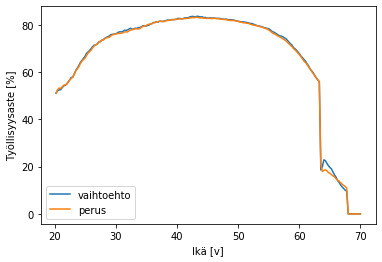

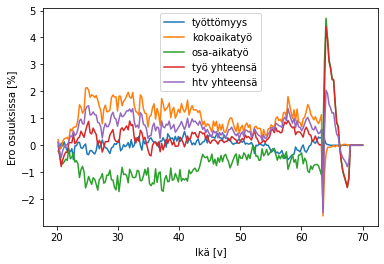

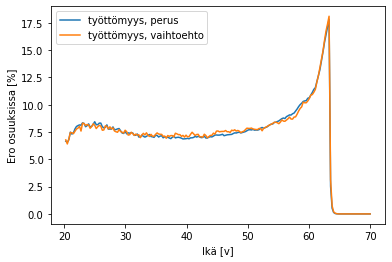

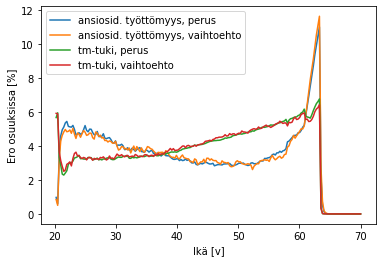

Työllisyysvaikutus 21-63-vuotiaisiin noin 20439 htv ja 8377 työllistä
Työllisyysastevaikutus 21-63-vuotiailla noin 0.28 prosenttia (75.76 vs 75.47)
epävarmuus työllisyysasteissa 0.0139, hajonta 0.0793


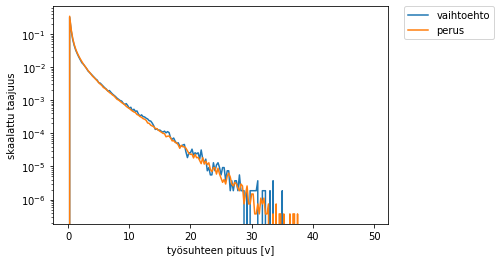

Jakauma ansiosidonnainen+tmtuki+putki, no max age
Perus keskikesto 0.7010615232697922 v vaihtoehto Keskikesto 0.6943269893487021 v
Perus lkm 93168 v vaihtoehto lkm 472994 v
Perus työtpäiviä yht 65316.5 v vaihtoehto työtpäiviä yht 328412.5 v


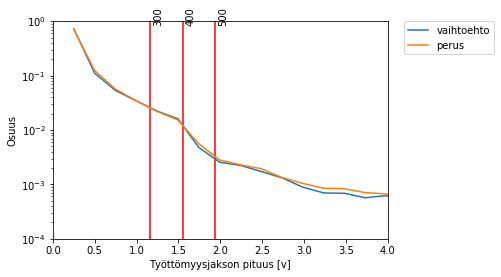

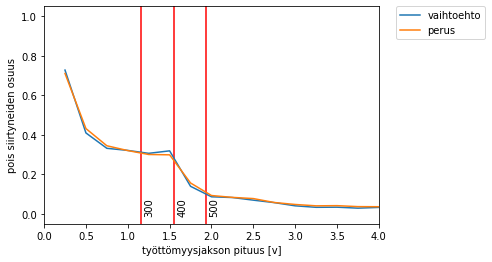

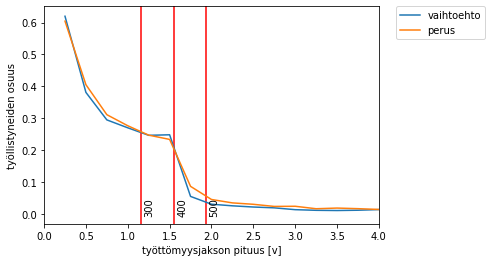

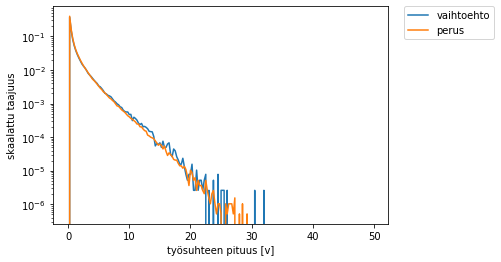

Jakauma ansiosidonnainen+tmtuki+putki, max age 54
Perus keskikesto 0.43740205954779493 v vaihtoehto Keskikesto 0.44009814535407765 v
Perus lkm 80406 v vaihtoehto lkm 408272 v
Perus työtpäiviä yht 35169.75 v vaihtoehto työtpäiviä yht 179679.75 v


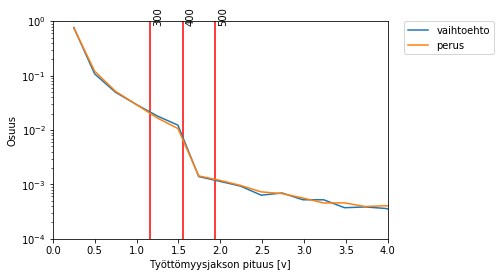

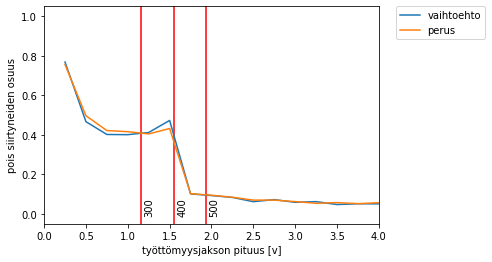

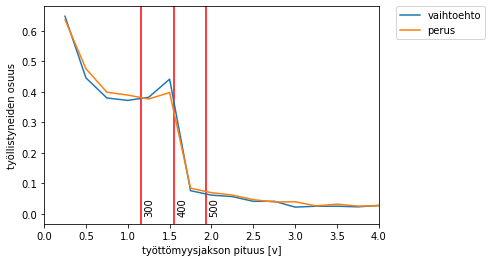

In [6]:
cc1_toe=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc1_toe.load_sim(load='results/12kk_results')
cc1_toe.compare_with(cc1)

## Ansiosidonnaisen päivärahan lyhennys 50 pv

Tarkastellaan, miten työllisyyteen vaikuttaisi ansiosidonnaisen päivärahan lyhentäminen 50 päivällä. Tällöin alle kolmen vuoden työhistorialla ansiosidonnaisen päivärahan enimmäiskesto olisi 250 pv ja pidemmällä työhistorialla enimmäiskesto olisi 350 pv.

In [ ]:
cc1_350=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,
                  mortality=mortality,perustulo=False,randomness=randomness)
cc1_350.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_50pv',plot=True,
                    results='results/50pv_results',start_from=perusmalli,cont=True,
                    callback_minsteps=callback_minsteps,twostage=twostage)



In [ ]:
cc1_350=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc1_350.load_sim(load='results/50pv_results')
cc1_350.compare_with(cc1)

## Perustulo

Alustava versio perustulosta, joka ei mallinna koko perustuloa vielä. Tulee muuttumaan, kun mukana koko mallli.

In [ ]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,perustulo=True,mortality=mortality,
                 randomness=randomness)
cc1_pt.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                   train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_pt',plot=True,
                   results='results/perustulo_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_pt.render(load='results/perustulo_results')


In [ ]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc1_pt.load_sim(load='results/perustulo_results')
cc1_pt.compare_with(cc1)

## 300 vs 400 päivän kesto ansiosidonnaisessa

Mikä on alle kolmen vuoden työhistorian lyhyemmän (300 pv) ansiosidonnaisen päivärahan enimmäiskeston vaikutus työllisyyteen? Kokeillaan miten työllisyyteen vaikuttaisi sen pidentäminen 400 päivään.

In [ ]:
cc1_400=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=400,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_400.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_300pv',plot=True,
                    results='results/300pv_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps,twostage=twostage)
cc1_400.render(load='results/300pv_results')


In [ ]:
cc1_400=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc1_400.load_sim(load='results/300pv_results')
cc1_400.compare_with(cc1)

# Deep Q-network

Kokeillaan toista menetelmää ratkaisuun. Muutos on helppo tehdä, muutetaan vain algoritmin valintaa säätelevän parametrin _rlmodel_ arvo, ja varmistetaan että kaikki lähtee alusta liikkeelle (_cont=False_). Deep Q-network on menetelmänä hitaampi kuin ACKTR, joten tässä aika-askelten määrä on rajattu 1 000 000:aan.

In [ ]:
#cc1q=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
#cc1q.explain()
#cc1q.run_results(debug=False,steps1=1_000_000,steps2=size2,pop=1_000,deterministic=deterministic,
#                train=True,predict=True,batch1=1,batch2=batch2,
#                save=perusmalli+'_dqn',plot=True,cont=False,start_from=perusmalli+'_dqn',results='results/perus_results3_dqn',
#                callback_minsteps=callback_minsteps,rlmodel='dqn',twostage=False)